# An Extended SIR Mathematical Model for Lumpy Skin Disease and Associated Properties

This report presents an extended Susceptible-Exposed-Infectious-Treated-Recovered (SEITR) mathematical
model designed to analyze the transmission dynamics of the Lumpy Skin Disease (LSD) virus in cattle popula-
tions. The model incorporates key aspects of LSD epidemiology and leverages network theory to represent the
complex interactions within the cattle population. The report discusses the model’s formulation, fundamental
properties, implementation, and experimental results. It also outlines potential avenues for future research.

## Introduction
Lumpy Skin Disease (LSD) is a severe disease that affects cattle, causing significant economic losses due to decreased milk production, weight loss, and damage to hides. The disease is caused by the LSD virus, which is primarily transmitted by blood-feeding insects. Understanding the transmission dynamics of the LSD virus is crucial for developing effective control and prevention strategies. To achieve this goal, mathematical modeling has emerged as a powerful tool. In particular, the Susceptible-Exposed-Infectious-Treated-Recovered (SEITR) model, an extension of the classic SIR model\cite{Harko}, has been widely used to study various diseases. The SEITR model incorporates an exposed stage, representing individuals who have been infected but are not yet infectious, and a treated stage, representing individuals who have been infected and are receiving treatment. In this report, we present an extended SEITR model designed to analyze the transmission dynamics of the LSD virus in cattle populations. Our model incorporates key aspects of LSD epidemiology, including the exposed and treated stages of the disease. Furthermore, our model leverages network theory to represent the complex interactions within the cattle population, which are crucial for understanding the spread of the LSD virus.

## Background
We implemented the SEITR model and this model's application on networks by using the R language. There are five libraries required for this implementation; igraph for network applications, deSolve for solving differential equations, foreach and doParallel for parallelization and Matrix for calculations. To apply SEITR model, we created different networks. We initialized this experiment with a Erdős-Rényi random network, and moved on to a bigger network with more complicated structure. Here the first network is designed to represent a small farmstead where each member of the network is highly connected to the members of the network, and the second network is aimed to replicate a small county with 4 farms that have very high connection within but very low connection in between. In addition to these networks, we account for the newborn members, naturally deceased members and members deceased due to infection in our implementation. To assign status transition, born and deceased nodes, we followed our SEITR model's parameters.

In [1]:
library(igraph)
library(deSolve)
library(foreach)
library(doParallel)
library(Matrix)

Warning message:
"package 'igraph' was built under R version 4.2.3"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Warning message:
"package 'deSolve' was built under R version 4.2.3"
Loading required package: iterators

Loading required package: parallel



## Extended SIR Model for Lumpy Skin Disease
Here we present the mathematical model used to analyze the transmission dynamics of the LSD virus in cattle populations. This model is an extension of the classic Susceptible-Infectious-Recovered model and incorporates key aspects of LSD epidemiology.
### Model Formulation
The model is an extension of the classic Susceptible-Infectious-Recovered (SIR) model with Exposed and Recovered statuses. The model consists of a system of non-linear ordinary differential equations (ODEs) expressing the transmission dynamics of the LSD virus:
- Susceptible (S): These are individuals who are susceptible to the disease. The rate of change of S is given by the equation: $$\frac{dS}{dt}= \Pi-\frac{\beta_1 SI}{N}-\eta S$$
Here, $\Pi$ is the birth rate, $\beta_1$ is the transmission rate of the disease, I is the number of infectious individuals, N is the total population, and $\eta$ is the natural death rate.
- Exposed (E): These are individuals who have been infected but are not yet infectious. The rate of change of E is given by the equation: $$\frac{dE}{dt}= \frac{\beta_1SI}{N}-(\gamma_2+\eta) E$$
Here, $\gamma_2$ is the rate at which exposed individuals become infectious.
- Infectious (I): These are individuals who are infectious. The rate of change of I is given by the equation: $$\frac{dI}{dt}=\gamma_2 E-(\gamma_3+\eta+d_I+\kappa_1)I$$
Here, $\gamma_3$ is the recovery rate, $dI$ is the disease-induced death rate, and $\kappa_1$ is the rate at which infectious individuals are treated.
- Treated (T): These are individuals who have been infected and are receiving treatment. The rate of change of T is given by the equation: $$\frac{dT}{dt}=\kappa_1 I-(\eta+d_T+\kappa_2)T$$
Here, $dT$ is the treatment-induced death rate, and $\kappa_2$ is the rate at which treated individuals recover.
- Recovered (R): These are individuals who have recovered from the disease. The rate of change of R is given by the equation: $$\frac{dR}{dt}= \gamma_3 I+\kappa_2 T-\eta R$$

with non-negative initial conditions;
$$S(0)=S_0,E(0)=E_0,I(0)=I_0,T(0)=T_0,R(0)=\mathcal{R}_0.$$
### Equilibrium Points
The model also includes two equilibrium points: the disease-free equilibrium and the endemic equilibrium. The disease-free equilibrium represents the state where the disease has been eradicated, while the endemic equilibrium represents the state where the disease persists in the population. The reproduction number $\mathcal{R}_0$ is a key quantity that determines the number of infections produced by an infectious individual. If $\mathcal{R}_0<1$, the disease-free equilibrium is stable, meaning the disease will die out. If $\mathcal{R}_0>1$, the endemic equilibrium is stable, meaning the disease will persist in the population.

Disease-Free Equilibrium: $\zeta =\left(\frac{\Pi}{\nu} , 0,0,0,0\right)$.

Endemic Equilibrium: $\Gamma^{1}=(S^{1},E^{1},I^{1},T^{1},R^{1})$, where $S^{1}$, $E^{1}$, $I^{1}$, $T^{1}$, and $R^{1}$ are given by the following equations:
$$S^{1}=\frac{\Lambda(-k_1 k_2 k_3+k_3\delta I \beta_2+\delta_T \alpha_1 \beta_2)} {(-k_3 \beta_1+k_3\delta_I+\delta_T \alpha_1)\beta_2 \mu}$$
$$E^{1}=\frac{-\Lambda\beta_1 \beta_2 k_1 k_3+ k_1^2 k_2 k_3 \Lambda}{-k_1 k_2 k_3 \beta_1 \beta_2 + k_1 k_2 k_3\delta_I \beta_2+k_1 k_2 \delta_T \alpha_1 \beta_2}$$
$$I^{1}=\frac{-\Lambda \beta_1 \beta_2 k_3+ k_1 k_2 k_3 \Lambda}{-k_1 k_2 k_3 \beta_1 + k_1 k_2 k_3\delta_I +k_1 k_2 \delta_T \alpha_1}$$
$$T^{1}=\frac{\alpha(-\Lambda \beta_1 \beta_2 k_3+ k_1 k_2 k_3\Lambda)}{k_3(-k_1 k_2 k_3 \beta_1 +k_1 k_2 k_3\delta_I +k_1 k_2 \delta_T \alpha_1)}$$
$$R^{1}=\frac{-\Lambda \beta_1 \beta_2 \beta_3 k_3+ k_1 k_2 k_3\beta_3 \Lambda-\Lambda \beta_1 \beta_2 \alpha_1 \alpha_2+k_1 k_2\alpha_1 \alpha_2 \Lambda}{\mu(-k_1 k_2 k_3 \beta_1 + k_1 k_2 k_3 \delta_I+ k_1 k_2 \alpha_1 \delta_T)}$$
$$N^{1}=\frac{\Lambda(-k_1 k_2 k_3+k_3\delta_I \beta_2+\delta_T\alpha_1 \beta_2)}{\mu \beta_2(-k_3 \beta_1 +k_3 \delta_I+\delta_T\alpha_1)}$$
### Reproduction Number and Stability}
The reproduction number $\mathcal{R}_0$ is a mathematical quantity that determines the number of infections produced by an infectious individual. For our model, it is given by:

$$\mathcal{R}_0=\frac{\beta_1 \beta_2 }{(\beta_3+\mu+\delta_I+\alpha_1)(\beta_2+\mu)}$$

The model is locally asymptotically stable (LAS) and globally asymptotically stable (GAS) at the disease-free equilibrium point $\zeta$ when $\mathcal{R}_0 < 1$ and unstable when $\mathcal{R}_0 > 1$, provided $\mathcal{R}_0 \ne 1$. The endemic equilibrium point $\Gamma^{1}$ of the model is LAS and GAS stable, provided $\mathcal{R}_0>1$.

## Experiment
In this experiment, we aim to simulate the dynamics of a disease outbreak in a population using a SEITR (Susceptible-Exposed-Infected-Treatment-Recovered) model. The SEITR model is an extension of the classic SIR (Susceptible-Infected-Recovered) model, incorporating additional states to capture more complex disease dynamics\cite{Harko}. The cattle population is represented as a graph, where each node represents an individual and edges represent interactions between individuals. The state of each individual (node) can be Susceptible (S), Exposed (E), Infected (I), in Treatment (Tt), or Recovered (R). The total population (N) is the sum of individuals in all states.

The simulation is run multiple times, with each run representing a different realization of the disease outbreak. The number of runs is determined by the user. In each run, the disease dynamics are simulated over a specified number of time steps. At the start of each run, the population graph is initialized with a specified number of individuals in each state. The initial conditions are set by the user. The graph is generated using the Erdős–Rényi model, which is a random graph model that generates graphs with a given number of nodes and a preferential attachment for edge creation. In addition to the random network, we created networks based on clusters (created with Erdős–Rényi model and preferential attachment) that are weakly connected to each other to represent a scenario where several farms in a small town have very limited interaction amongst their herds.

In this experiment, we also take into account the impact of treatment on the disease dynamics. Individuals in the Infected state can transition to the Treatment state, and individuals in the Treatment state can eventually Recover. This aspect of the model allows us to explore the effects of interventions such as medical treatment or quarantine on the course of the outbreak. By adjusting the parameters related to treatment, we can simulate scenarios with different levels of intervention and observe their effects on the disease spread. During each time step of the simulation, the state of each individual can change according to certain rules and probabilities. These rules capture the disease transmission process and the recovery process. The probabilities are determined by a set of parameters, which are introduced in the model section previously.

The disease transmission process includes the following transitions:
- Susceptible individuals can become Exposed if they interact with Infected or Exposed individuals.
- Exposed individuals can become Infected.
- Infected individuals can either go into Treatment or Recover.

The recovery process includes the following transitions:
- Individuals in Treatment can Recover.
- Recovered individuals remain in the Recovered state.

In addition to these transitions, individuals can also enter or leave the population. New Susceptible individuals can enter the population at a constant rate (Lambda), and individuals can leave the population due to natural death (mu) or disease-induced (delta\_I) death. The state of the population is recorded at each time step, including the number of individuals in each state and the total population size. These data are stored in a list for each run. After all runs are completed, the results are analyzed and visualized. The number of individuals in each state is plotted over time for each run, allowing for a comparison of the disease dynamics across different runs.

This experiment provides a detailed and flexible framework for simulating and analyzing disease outbreaks in a population. By adjusting the parameters and initial conditions, it can be used to study a wide range of diseases and outbreak scenarios. The use of a graph to represent the population allows for the inclusion of complex interaction patterns and heterogeneity in the population, making it a powerful tool for understanding disease spread in real-world populations. It's important to note that the results of this experiment are stochastic due to the random nature of the graph generation and the disease transmission process. Therefore, the results can vary between runs. To obtain robust results, it is recommended to run the simulation multiple times and analyze the average behavior.

### Experiment 1: Erdős–Rényi Graph with preferential attachment

In the first experiment, the SEITR model was applied to a single Erdős–Rényi graph with 100 nodes. The initial conditions were set as follows: 70 Susceptible, 10 Infected, and 20 Exposed individuals. The model parameters were set to Lambda = 1, beta1 = 0.8, beta2 = 0.3, beta3 = 0.02, alpha1 = 0.1, alpha2 = 0.055, delta\_I = 0.03, delta\_T = 0.03, and mu = 0.01. The Erdős–Rényi graph was generated with a connection probability of 0.85. To observe the status changes, we plotted the network on several time steps with each status represented with a different color. The output shows the initial network with 70 Susceptible, 20 Exposed and 10 infected nodes. After the first time step shown, we observed one of the nodes getting treated and the numbers of Exposed and Infected increased. As we progress though time, the Infected, then the Treated and then the Recovered nodes dominate the population for this case. These outputs show that the number of Susceptibles follow a decreasing trend, the number of Exposed and the number of Infected first increases then decreases, the number of Treated and Recovered nodes are increased throughout the 100 time steps.

In [2]:
# Model Parameters
Lambda <- 1            # Number of births
beta1 <- 0.8           # S to E rate of transfer
beta2 <- 0.3           # E to I rate of transfer
beta3 <- 0.02          # I to R rate of transfer
alpha1 <- 0.1          # I to Tt rate of transfer (alpha1 - beta3)
alpha2 <- 0.055        # Tt to R rate of transfer
delta_I <- 0.03        # Rate of death due to Infection
delta_T <- 0.03
mu <- 0.01             # Rate of natural death
# Lambda is the number of nodes added at each time step. (1 for this example)
# mu * N + delta_I * I is the number of nodes removed at each time step. (1 + 0.3 for this example)
# With these parameters, total population is expected to decrease slowly.

# Reproduction number
R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

# Initial conditions
n <- 100
S <- 70
I <- 10
E <- 20
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

# SEITR model
SEITR <- function(t, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- Lambda - (beta1 * S * I) / N - mu * S
    dE <- (beta1 * S * I) / N - (beta2 + mu) * E
    dI <- beta2 * E - (beta3 + mu + delta_I + alpha1) * I
    dT <- alpha1 * I - (mu + delta_T + alpha2) * Tt
    dR <- beta3 * I + alpha2 * Tt - mu * R
    dN <- Lambda - N * mu - delta_I * I - delta_T * Tt
    list(c(dS, dE, dI, dT, dR, dN))
  })
}

# Initial state
state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)

# Parameters
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)

# Time steps
times <- seq(0, 100, by = 1)

# Solve ODE
out <- ode(y = state, times = times, func = SEITR, parms = parameters)

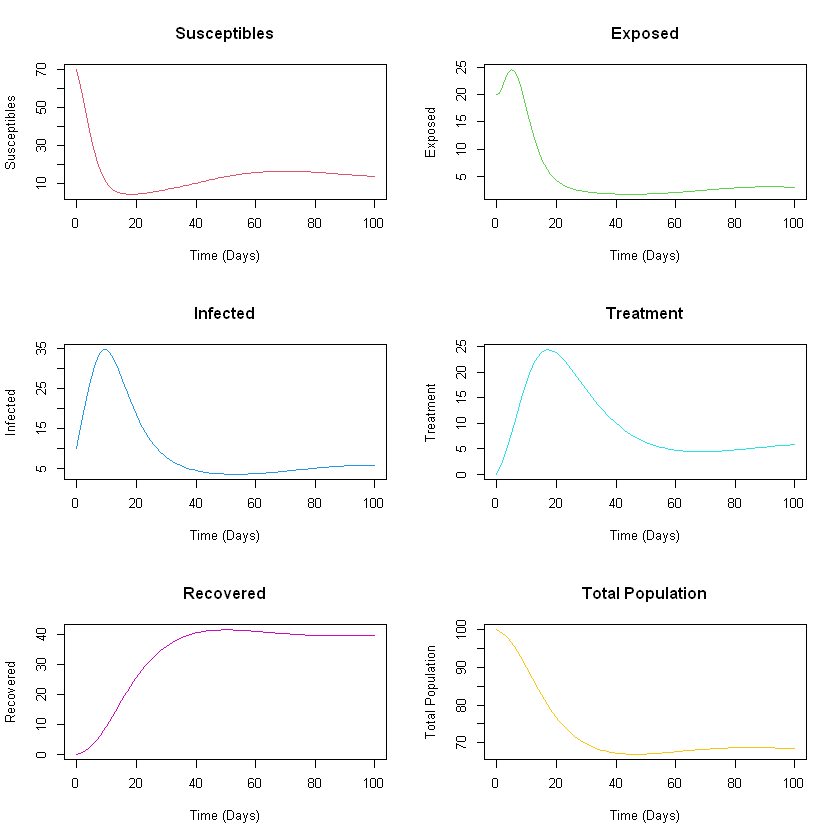

In [3]:
# Plot each status separately
par(mfrow = c(3, 2))
plot(out[, "time"], out[, "S"], type = "l", col = 2, xlab = "Time (Days)", ylab = "Susceptibles", main = "Susceptibles")
plot(out[, "time"], out[, "E"], type = "l", col = 3, xlab = "Time (Days)", ylab = "Exposed", main = "Exposed")
plot(out[, "time"], out[, "I"], type = "l", col = 4, xlab = "Time (Days)", ylab = "Infected", main = "Infected")
plot(out[, "time"], out[, "Tt"], type = "l", col = 5, xlab = "Time (Days)", ylab = "Treatment", main = "Treatment")
plot(out[, "time"], out[, "R"], type = "l", col = 6, xlab = "Time (Days)", ylab = "Recovered", main = "Recovered")
plot(out[, "time"], out[, "N"], type = "l", col = 7, xlab = "Time (Days)", ylab = "Total Population", main = "Total Population")

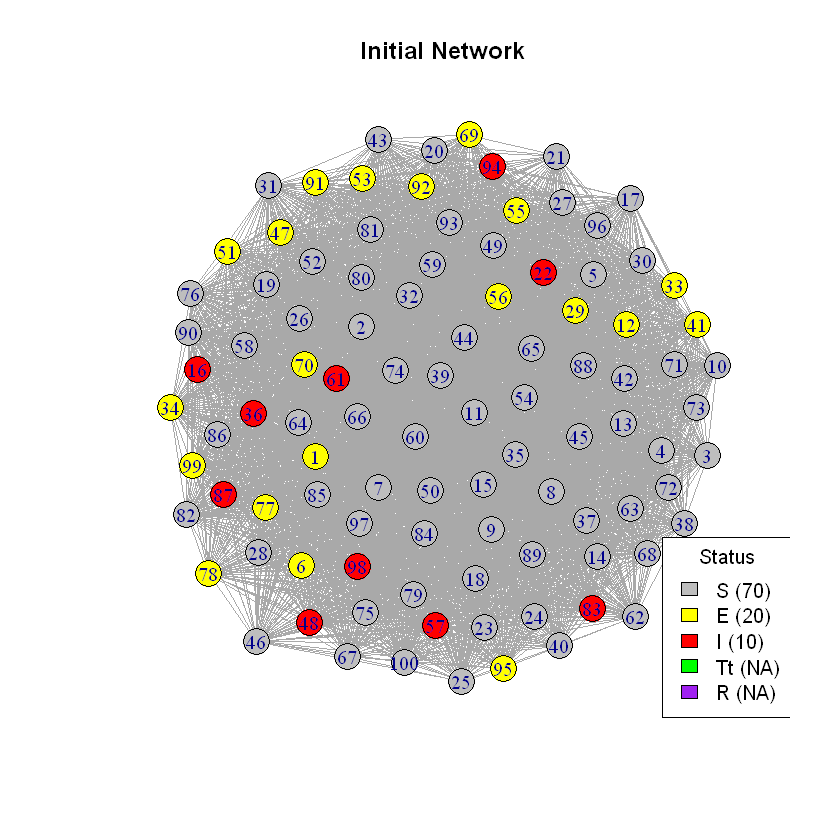

In [4]:
# Create the graph
g <- erdos.renyi.game(n, 0.85)
V(g)$label <- 1:n
V(g)$status <- "S"
V(g)$status[sample(1:n, size = I)] <- "I"
V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"

# Initialize counters
S_count <- S
E_count <- E
I_count <- I
Tt_count <- Tt
R_count <- R
N_count <- N

# Initialize vectors to store metrics
degree_dist <- vector("list", length(times))
clustering_coeff <- numeric(length(times))
avg_path_length <- numeric(length(times))
largest_comp_size <- numeric(length(times))

# Color mapping for statuses
status_colors <- c("S" = "gray", "E" = "yellow", "I" = "red", "Tt" = "green", "R" = "purple")
par(mfrow = c(1, 1))

# Initial Network plot
plot(g, vertex.color = status_colors[V(g)$status], vertex.label = V(g)$label, vertex.size=10)
title(paste("Initial Network"))
status_counts <- table(V(g)$status)
status_labels <- paste(names(status_colors), " (", status_counts[names(status_colors)], ")", sep = "")
legend("bottomright", legend = status_labels, fill = status_colors, title = "Status")

Time 0 : Node 16 with status I removed due to Infection
Time 0 : Node 24 with status S removed
Time 0 : New node 101 added with status S 
Time 0 : Node 1 changed status from E to I
Time 0 : Node 6 changed status from E to I
Time 0 : Node 12 changed status from E to I
Time 0 : Node 15 changed status from S to E
Time 0 : Node 34 changed status from E to I
Time 0 : Node 35 changed status from S to E
Time 0 : Node 45 changed status from S to E
Time 0 : Node 51 changed status from E to I
Time 0 : Node 53 changed status from E to I
Time 0 : Node 56 changed status from E to I
Time 0 : Node 57 changed status from I to Tt
Time 0 : Node 65 changed status from S to E
Time 0 : Node 72 changed status from S to E
Time 0 : Node 76 changed status from S to E
Time 0 : Node 84 changed status from S to E
Time 0 : Node 89 changed status from S to E
Time 0 : Node 94 changed status from I to Tt
Time 0 : Node 95 changed status from E to I
Time 0 : Node 99 changed status from E to I
Time 1 : Node 53 with stat

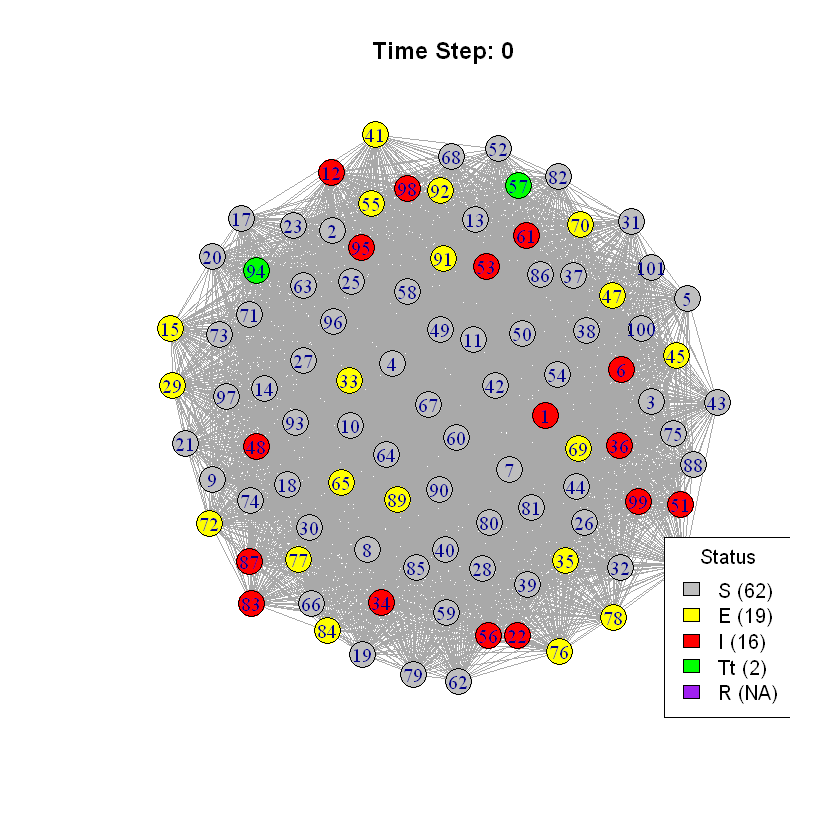

Time 11 : Node 13 with status I removed due to Infection
Time 11 : Node 82 with status Tt removed
Time 11 : New node 112 added with status S 
Time 11 : Node 9 changed status from S to E
Time 11 : Node 25 changed status from S to E
Time 11 : Node 50 changed status from S to E
Time 11 : Node 58 changed status from E to I
Time 11 : Node 92 changed status from I to Tt
Time 11 : Node 99 changed status from I to R
Time 11 : Node 106 changed status from E to I
Time 11 : Node 110 changed status from E to I
Time 12 : Node 47 with status I removed due to Infection
Time 12 : Node 91 with status R removed
Time 12 : New node 113 added with status S 
Time 12 : Node 5 changed status from E to I
Time 12 : Node 9 changed status from E to I
Time 12 : Node 43 changed status from S to E
Time 12 : Node 46 changed status from E to I
Time 12 : Node 60 changed status from E to I
Time 12 : Node 63 changed status from I to Tt
Time 12 : Node 84 changed status from I to R
Time 12 : Node 107 changed status from E 

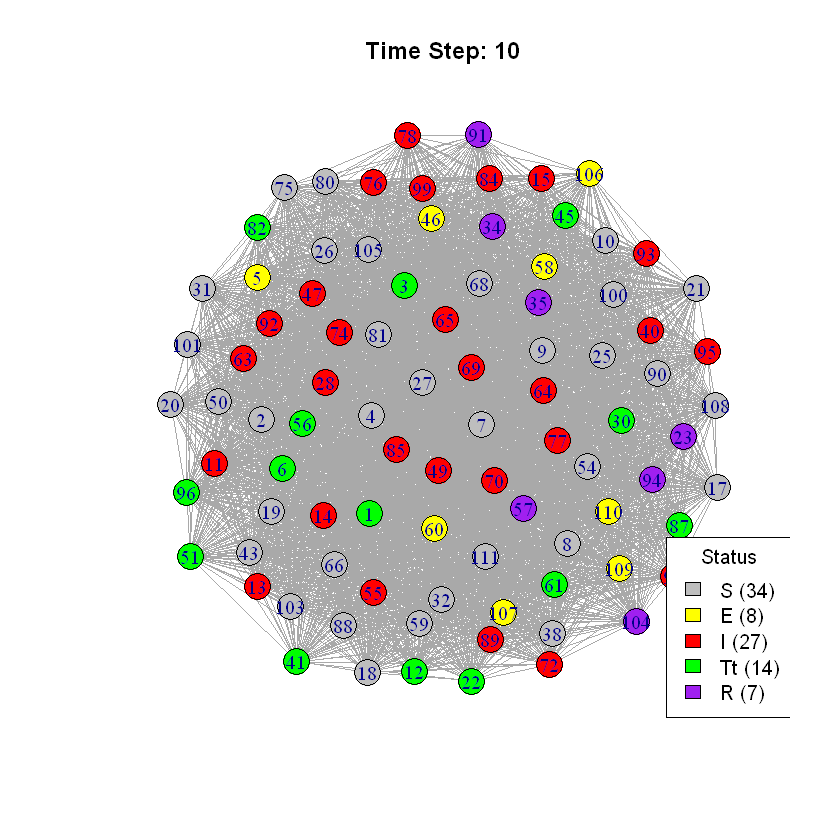

Time 21 : Node 68 with status S removed
Time 21 : New node 122 added with status S 
Time 21 : Node 8 changed status from I to Tt
Time 21 : Node 17 changed status from E to I
Time 21 : Node 25 changed status from Tt to R
Time 21 : Node 41 changed status from Tt to R
Time 21 : Node 69 changed status from Tt to R
Time 21 : Node 77 changed status from I to Tt
Time 21 : Node 81 changed status from E to I
Time 21 : Node 103 changed status from E to I
Time 22 : Node 58 with status I removed due to Infection
Time 22 : Node 22 with status Tt removed
Time 22 : New node 123 added with status S 
Time 22 : Node 6 changed status from Tt to R
Time 22 : Node 8 changed status from Tt to R
Time 22 : Node 59 changed status from I to Tt
Time 22 : Node 98 changed status from I to Tt
Time 22 : Node 120 changed status from E to I
Time 23 : Node 65 with status I removed due to Infection
Time 23 : Node 88 with status I removed
Time 23 : New node 124 added with status S 
Time 23 : Node 2 changed status from S t

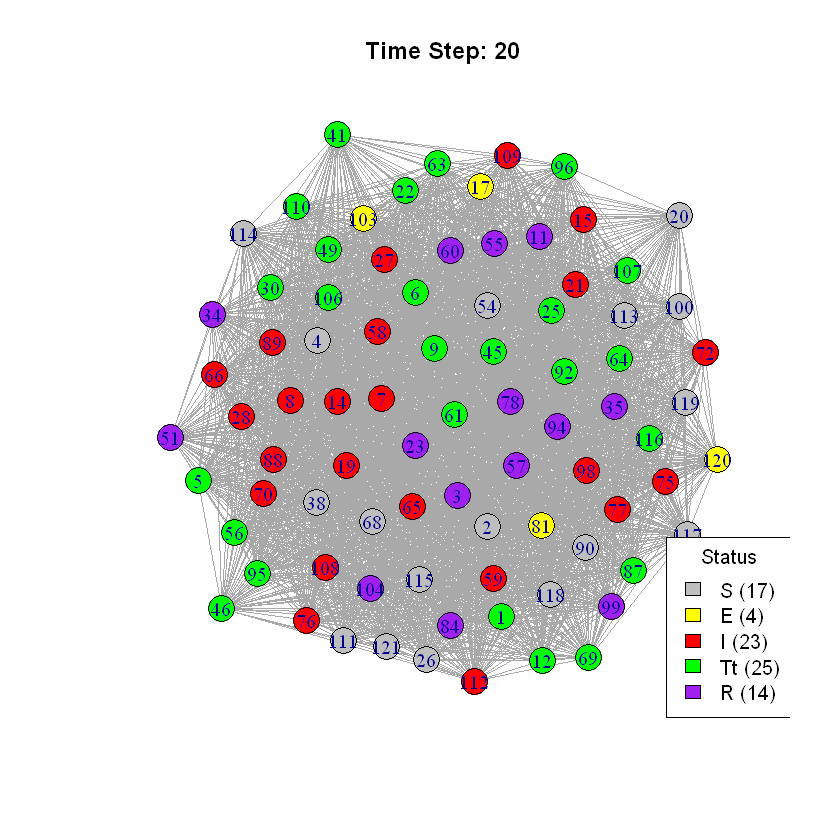

Time 31 : Node 20 with status I removed
Time 31 : New node 132 added with status S 
Time 31 : Node 54 changed status from E to I
Time 31 : Node 89 changed status from I to Tt
Time 31 : Node 90 changed status from E to I
Time 32 : Node 21 with status I removed due to Infection
Time 32 : Node 3 with status R removed
Time 32 : New node 133 added with status S 
Time 32 : Node 81 changed status from Tt to R
Time 32 : Node 122 changed status from S to E
Time 33 : Node 103 with status I removed due to Infection
Time 33 : Node 106 with status R removed
Time 33 : New node 134 added with status S 
Time 33 : Node 70 changed status from I to Tt
Time 33 : Node 76 changed status from I to R
Time 33 : Node 118 changed status from E to I
Time 33 : Node 122 changed status from E to I
Time 33 : Node 128 changed status from I to Tt
Time 34 : Node 84 with status R removed
Time 34 : New node 135 added with status S 
Time 34 : Node 7 changed status from Tt to R
Time 34 : Node 19 changed status from I to Tt


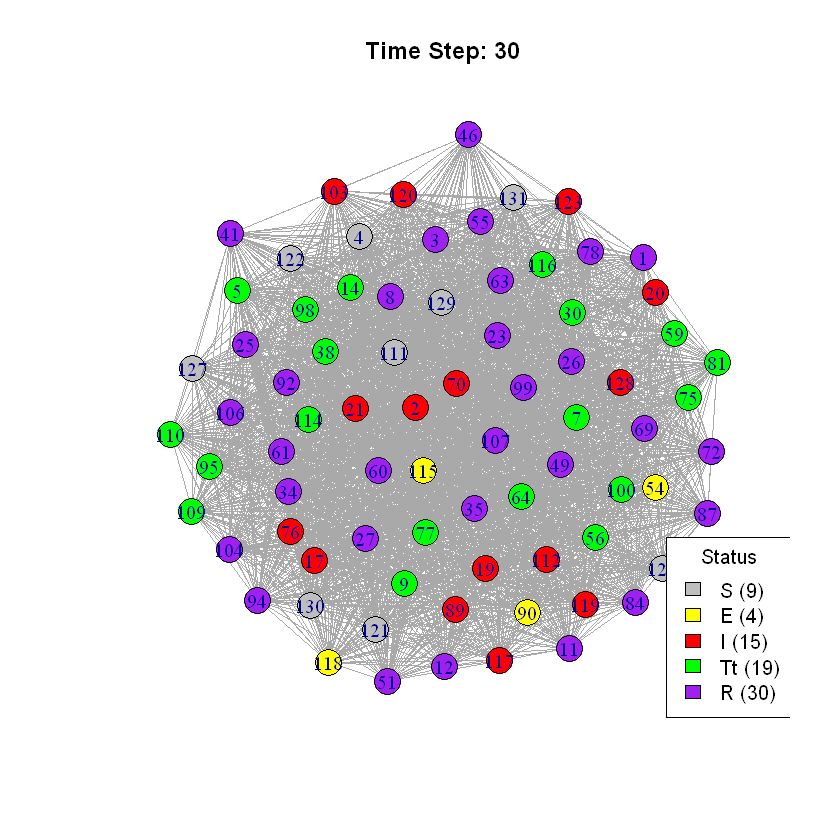

Time 41 : Node 95 with status R removed
Time 41 : New node 142 added with status S 
Time 41 : Node 5 changed status from Tt to R
Time 41 : Node 128 changed status from Tt to R
Time 41 : Node 139 changed status from E to I
Time 42 : Node 112 with status I removed due to Infection
Time 42 : Node 99 with status R removed
Time 42 : New node 143 added with status S 
Time 42 : Node 30 changed status from Tt to R
Time 43 : Node 81 with status R removed
Time 43 : New node 144 added with status S 
Time 43 : Node 59 changed status from Tt to R
Time 44 : Node 133 with status I removed due to Infection
Time 44 : Node 38 with status Tt removed
Time 44 : New node 145 added with status S 
Time 44 : Node 109 changed status from Tt to R
Time 44 : Node 140 changed status from S to E
Time 45 : Node 114 with status R removed
Time 45 : New node 146 added with status S 
Time 45 : Node 54 changed status from I to Tt
Time 45 : Node 70 changed status from Tt to R
Time 45 : Node 123 changed status from I to Tt


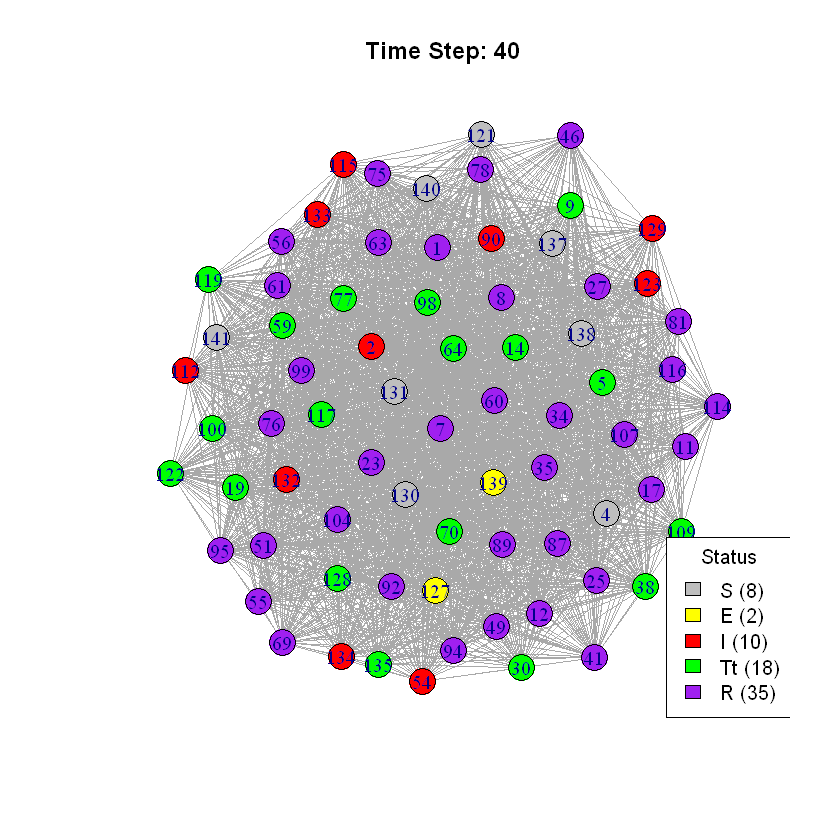

Time 51 : Node 70 with status R removed
Time 51 : New node 152 added with status S 
Time 51 : Node 140 changed status from I to Tt
Time 51 : Node 147 changed status from S to E
Time 51 : Node 148 changed status from E to I
Time 52 : Node 141 with status I removed due to Infection
Time 52 : Node 63 with status R removed
Time 52 : New node 153 added with status S 
Time 52 : Node 142 changed status from E to I
Time 52 : Node 153 changed status from S to E
Time 53 : Node 92 with status R removed
Time 53 : New node 154 added with status S 
Time 53 : Node 2 changed status from I to R
Time 53 : Node 119 changed status from Tt to R
Time 53 : Node 146 changed status from S to E
Time 53 : Node 147 changed status from E to I
Time 53 : Node 153 changed status from E to I
Time 53 : Node 154 changed status from S to E
Time 54 : Node 98 with status Tt removed
Time 54 : New node 155 added with status S 
Time 54 : Node 138 changed status from S to E
Time 55 : Node 23 with status R removed
Time 55 : New

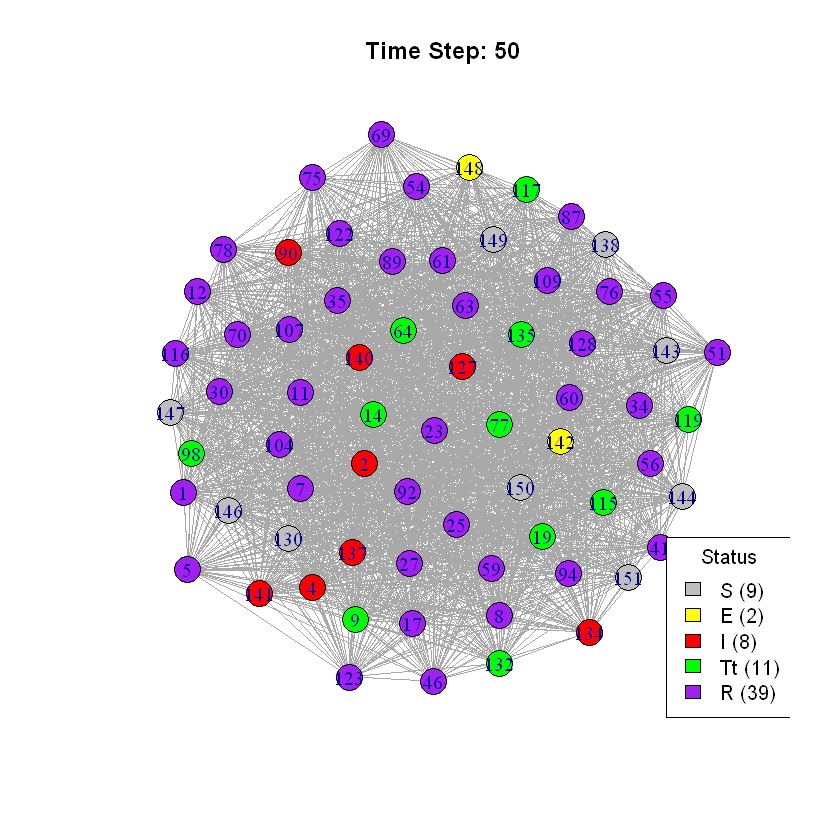

Time 61 : Node 77 with status Tt removed
Time 61 : New node 162 added with status S 
Time 61 : Node 9 changed status from Tt to R
Time 61 : Node 137 changed status from I to R
Time 61 : Node 138 changed status from I to Tt
Time 62 : Node 153 with status I removed
Time 62 : New node 163 added with status S 
Time 62 : Node 127 changed status from Tt to R
Time 62 : Node 143 changed status from S to E
Time 63 : Node 2 with status R removed
Time 63 : New node 164 added with status S 
Time 63 : Node 143 changed status from E to I
Time 63 : Node 150 changed status from I to Tt
Time 63 : Node 151 changed status from S to E
Time 63 : Node 156 changed status from I to R
Time 63 : Node 159 changed status from S to E
Time 64 : Node 56 with status R removed
Time 64 : New node 165 added with status S 
Time 64 : Node 130 changed status from E to I
Time 64 : Node 161 changed status from S to E
Time 64 : Node 164 changed status from S to E
Time 65 : Node 162 with status S removed
Time 65 : New node 166

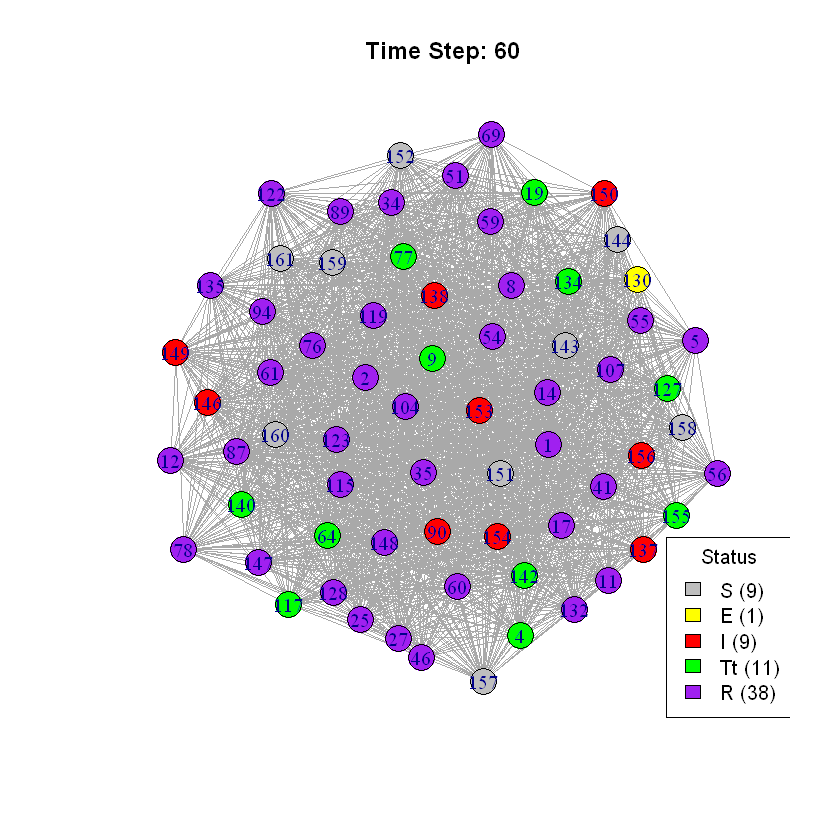

Time 71 : Node 156 with status R removed
Time 71 : New node 172 added with status S 
Time 71 : Node 151 changed status from E to I
Time 72 : Node 19 with status Tt removed
Time 72 : New node 173 added with status S 
Time 72 : Node 155 changed status from Tt to R
Time 73 : Node 144 with status E removed
Time 73 : New node 174 added with status S 
Time 73 : Node 143 changed status from I to Tt
Time 73 : Node 174 changed status from S to E
Time 74 : Node 128 with status R removed
Time 74 : New node 175 added with status S 
Time 74 : Node 157 changed status from S to E
Time 74 : Node 166 changed status from S to E
Time 75 : Node 46 with status R removed
Time 75 : New node 176 added with status S 
Time 75 : Node 140 changed status from Tt to R
Time 75 : Node 174 changed status from E to I
Time 75 : Node 175 changed status from S to E
Time 76 : Node 51 with status R removed
Time 76 : New node 177 added with status S 
Time 76 : Node 168 changed status from E to I
Time 77 : Node 168 with statu

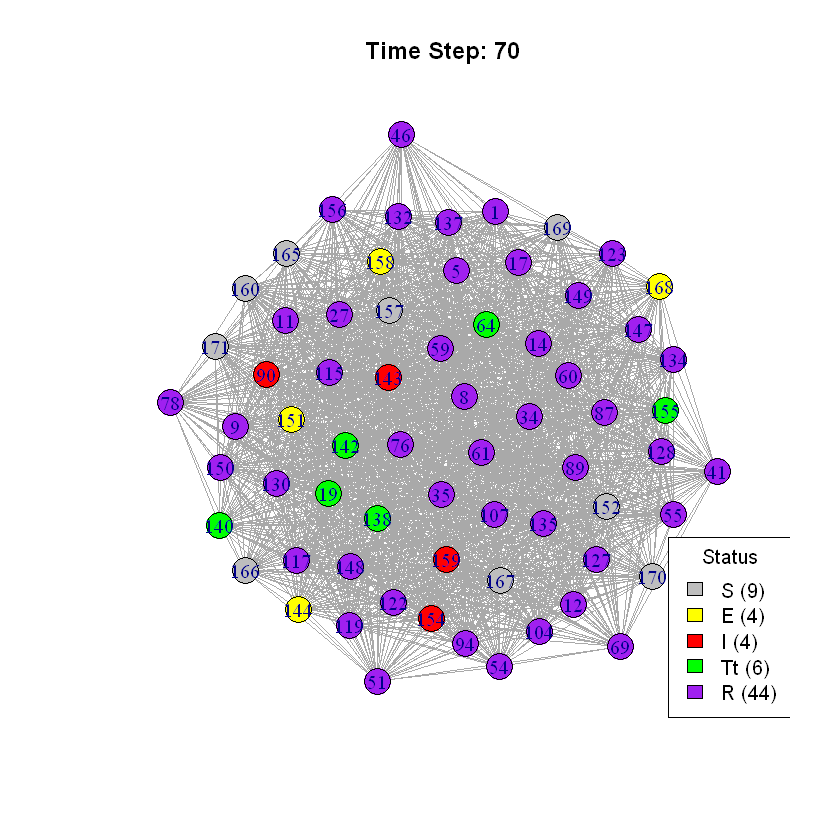

Time 81 : Node 151 with status I removed due to Infection
Time 81 : Node 55 with status R removed
Time 81 : New node 182 added with status S 
Time 82 : Node 179 with status E removed
Time 82 : New node 183 added with status S 
Time 82 : Node 154 changed status from I to Tt
Time 82 : Node 165 changed status from S to E
Time 83 : Node 158 with status I removed due to Infection
Time 83 : Node 176 with status S removed
Time 83 : New node 184 added with status S 
Time 83 : Node 166 changed status from E to I
Time 83 : Node 175 changed status from E to I
Time 84 : Node 69 with status R removed
Time 84 : New node 185 added with status S 
Time 84 : Node 160 changed status from E to I
Time 85 : Node 149 with status R removed
Time 85 : New node 186 added with status S 
Time 85 : Node 138 changed status from Tt to R
Time 85 : Node 165 changed status from E to I
Time 86 : Node 54 with status R removed
Time 86 : New node 187 added with status S 
Time 86 : Node 170 changed status from E to I
Time 86

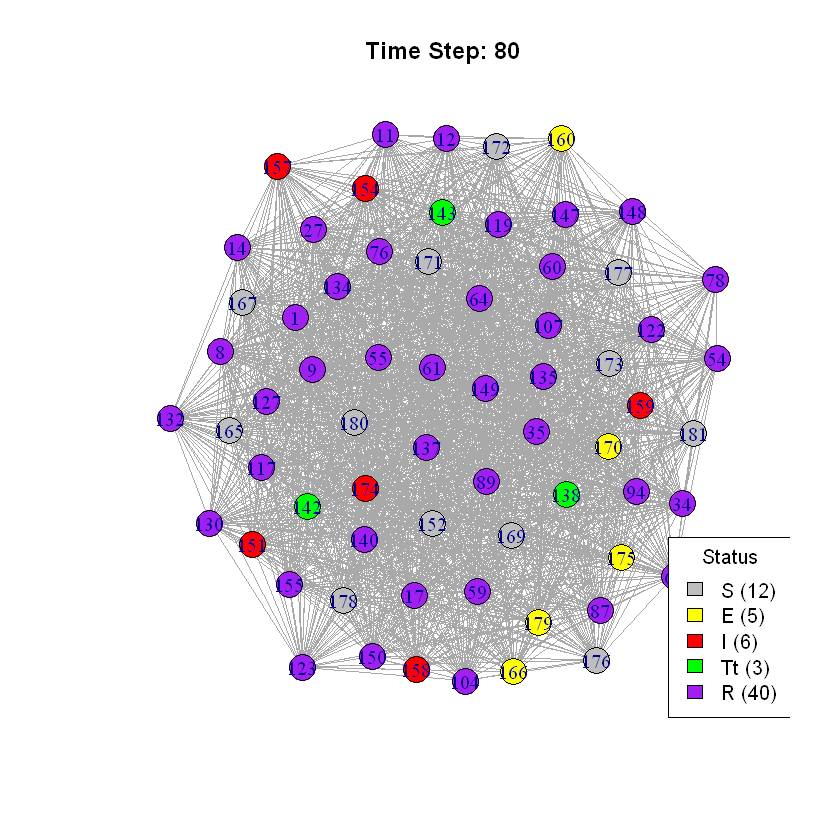

Time 91 : Node 89 with status R removed
Time 91 : New node 192 added with status S 
Time 91 : Node 192 changed status from S to E
Time 92 : Node 175 with status I removed
Time 92 : New node 193 added with status S 
Time 92 : Node 154 changed status from Tt to R
Time 93 : Node 154 with status R removed
Time 93 : New node 194 added with status S 
Time 93 : Node 152 changed status from S to E
Time 93 : Node 171 changed status from S to E
Time 93 : Node 183 changed status from S to E
Time 93 : Node 184 changed status from S to E
Time 94 : Node 9 with status R removed
Time 94 : New node 195 added with status S 
Time 94 : Node 171 changed status from E to I
Time 94 : Node 181 changed status from E to I
Time 95 : Node 34 with status R removed
Time 95 : New node 196 added with status S 
Time 95 : Node 167 changed status from E to I
Time 95 : Node 170 changed status from I to Tt
Time 95 : Node 193 changed status from S to E
Time 96 : Node 171 with status I removed due to Infection
Time 96 : Nod

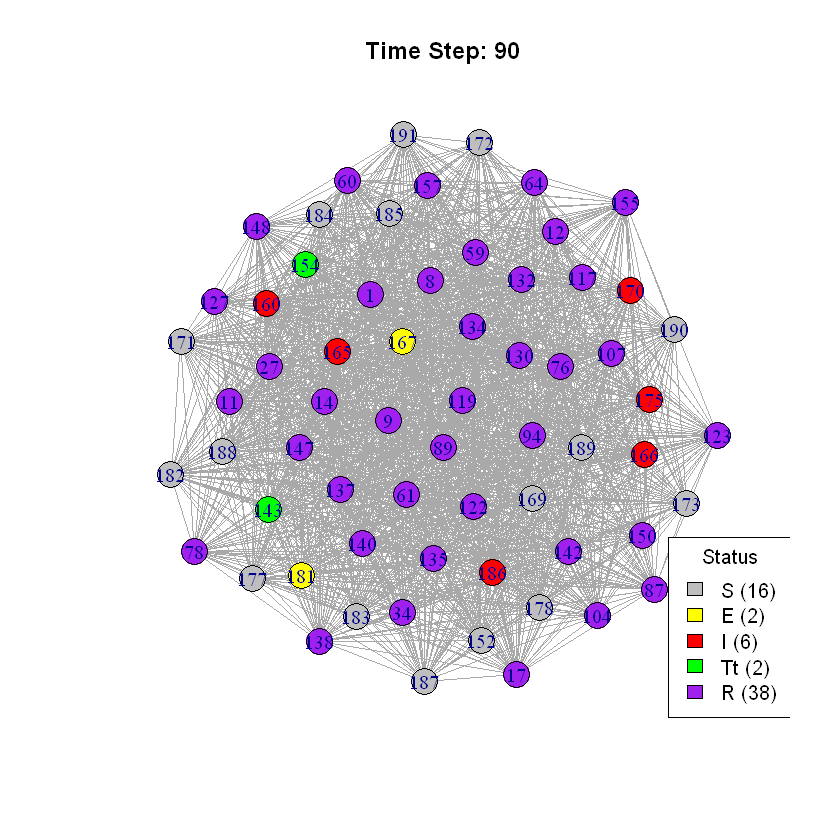

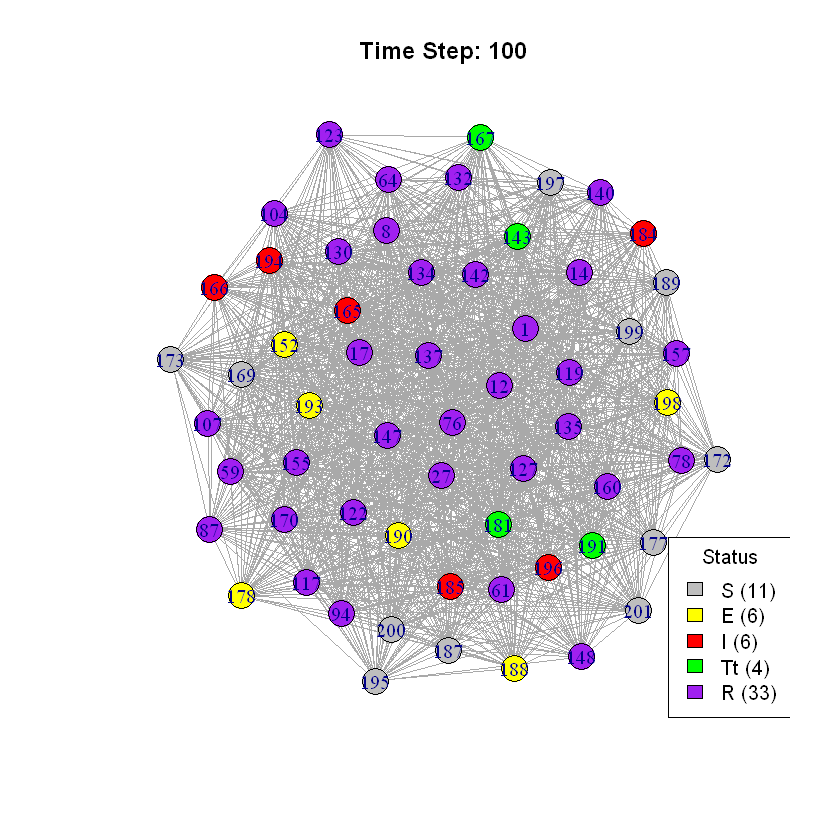

In [5]:
# Initialize a counter for the node labels
node_counter <- vcount(g)

# Iterate over time steps
for (t in times) {
  # Save old statuses for tracking changes
  old_status <- V(g)$status
  
  # Remove nodes deceased due to Infection (count = delta_I * I)
  nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
  nodes_with_status_I <- which(V(g)$status == "I")
  
  # Check if the number of nodes to remove is less than 1
  if (nodes_to_remove_count < 1) {
    # Generate a random number between 0 and 1
    random_number <- runif(1)
    
    # Check if the random number is greater than nodes_to_remove_count
    if (random_number < nodes_to_remove_count) {
      node_to_remove <- sample(nodes_with_status_I, 1)
      
      # Print node to be removed
      cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed due to Infection\n")
      
      # Remove the selected node
      g <- delete_vertices(g, node_to_remove)
    }
  } else {
    for (i in 1:nodes_to_remove_count){
      node_to_remove <- sample(nodes_with_status_I, 1)
      
      # Print node to be removed
      cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed due to Infection\n")
      
      # Remove the selected node
      g <- delete_vertices(g, node_to_remove)
    }
  }
  
  # Remove nodes for deceased (count = mu * N)
  for (i in 1:(mu * N)) {
    node_to_remove <- sample(vcount(g), 1)
    
    # Print node to be removed
    cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed\n")
    
    # Remove node from graph
    g <- delete_vertices(g, node_to_remove)
  }
  
  # Add new nodes to the network (count = Lambda)
  for (i in 1:(Lambda)) {
    node_counter <- node_counter + 1
    new_status <- "S"
    new_label <- node_counter  # Use the counter for the label
    
    g <- add_vertices(g, 1)
    V(g)[vcount(g)]$status <- new_status
    V(g)[vcount(g)]$label <- new_label  # Assign label to new node
    
    # Get the degree of each node
    degree <- degree(g, mode = "all")
    # Calculate the average degree
    avg_degree <- mean(degree)
    # Calculate the probability of attaching to each node
    prob <- degree / sum(degree)
  
    # Choose nodes to attach to
    nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
    
    # Add edges to these nodes
    for (node_to_attach in nodes_to_attach) {
      if (V(g)[node_to_attach]$label != new_label) { # No self edges
        g <- add_edges(g, c(vcount(g), node_to_attach))
      }
    }
    
    # Print new node
    cat("Time", t, ": New node", new_label, "added with status", new_status, "\n")
  }
  
  # Iterate over nodes for status changes
  for (i in V(g)) {
    # Get current status
    status <- V(g)[i]$status
    
    # Generate a random number
    rand <- runif(1)
    
    # Update status based on model parameters and current status
    if (status == "S") {
      # Get the statuses of the node's neighbors
      neighbor_statuses <- V(g)[neighbors(g, i)]$status
      # Check if any neighbor is E or I and rnd < beta1 * I / N
      if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
        V(g)[i]$status <- "E"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from S to E\n")
      }
    } # Else if status = E, check if rnd < beta2 
    else if (status == "E" && rand < beta2) {
      V(g)[i]$status <- "I"
      cat("Time", t, ": Node", V(g)[i]$label, "changed status from E to I\n")
    } # Else if status = I, check if rnd < beta3, else if rnd < alpha1  
    else if (status == "I") {
      if (rand < beta3) {
        V(g)[i]$status <- "R"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from I to R\n")
      } else if (rand < alpha1) {
        V(g)[i]$status <- "Tt"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from I to Tt\n")
      }
    } # Else if status = Tt, check if rnd < alpha2 
    else if (status == "Tt" && rand < alpha2) {
      V(g)[i]$status <- "R"
      cat("Time", t, ": Node", V(g)[i]$label, "changed status from Tt to R\n")
    }
  }
  
  # Store counts
  S_count[t+1] <- sum(V(g)$status == "S")
  E_count[t+1] <- sum(V(g)$status == "E")
  I_count[t+1] <- sum(V(g)$status == "I")
  Tt_count[t+1] <- sum(V(g)$status == "Tt")
  R_count[t+1] <- sum(V(g)$status == "R")
  N_count[t+1] <- vcount(g)
  
  # Calculate and store metrics
  degree_dist[[t+1]] <- degree_distribution(g)
  clustering_coeff[t+1] <- transitivity(g, type = "global")
  avg_path_length[t+1] <- mean_distance(g, directed = FALSE)
  comps <- components(g)
  largest_comp_size[t+1] <- max(comps$csize)
  
  # Plot network in every 10th time step
  if (t %% 10 == 0) {
    plot(g, vertex.color = status_colors[V(g)$status], vertex.size=10, vertex.label=V(g)$label)
    title(paste("Time Step:", t))
    status_counts <- table(V(g)$status)
    status_labels <- paste(names(status_colors), " (", status_counts[names(status_colors)], ")", sep = "")
    legend("bottomright", legend = status_labels, fill = status_colors, title = "Status")
  }
}

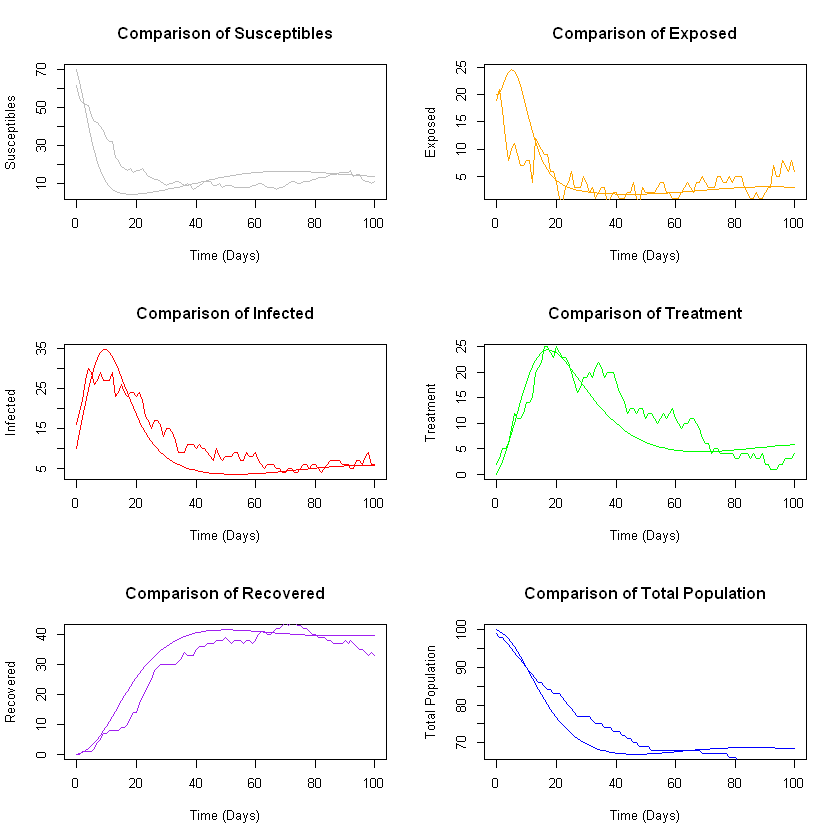

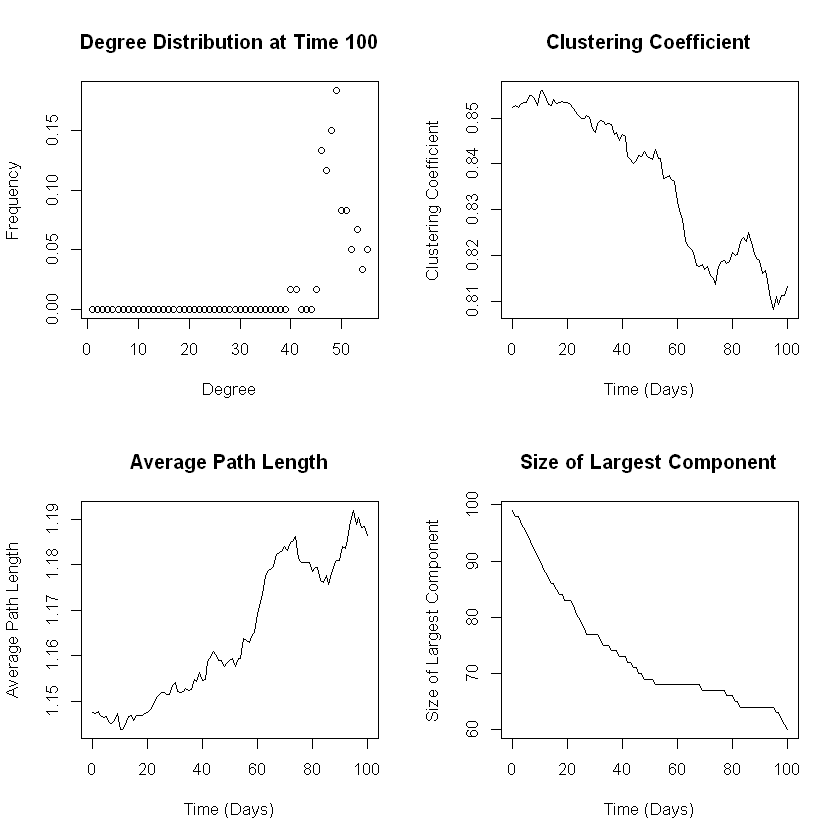

In [6]:
# Set up a single plot for comparison
par(mfrow = c(3, 2))
plot(out[, "time"], out[, "S"], type = "l", col = status_colors["S"], xlab = "Time (Days)", ylab = "Susceptibles", main = "Comparison of Susceptibles")
lines(times, S_count, col = status_colors["S"])
plot(out[, "time"], out[, "E"], type = "l", col = "orange", xlab = "Time (Days)", ylab = "Exposed", main = "Comparison of Exposed")
lines(times, E_count, col = "orange")
plot(out[, "time"], out[, "I"], type = "l", col = status_colors["I"], xlab = "Time (Days)", ylab = "Infected", main = "Comparison of Infected")
lines(times, I_count, col = status_colors["I"])
plot(out[, "time"], out[, "Tt"], type = "l", col = status_colors["Tt"], xlab = "Time (Days)", ylab = "Treatment", main = "Comparison of Treatment")
lines(times, Tt_count, col = status_colors["Tt"])
plot(out[, "time"], out[, "R"], type = "l", col = status_colors["R"], xlab = "Time (Days)", ylab = "Recovered", main = "Comparison of Recovered")
lines(times, R_count, col = status_colors["R"])
plot(out[, "time"], out[, "N"], type = "l", col = "blue", xlab = "Time (Days)", ylab = "Total Population", main = "Comparison of Total Population")
lines(times, N_count, col = "blue")

# Plot metrics
par(mfrow = c(2, 2))
plot(degree_dist[[t+1]], main = paste("Degree Distribution at Time", t), xlab = "Degree", ylab = "Frequency")
plot(times, clustering_coeff, type = "l", xlab = "Time (Days)", ylab = "Clustering Coefficient", main = "Clustering Coefficient")
plot(times, avg_path_length, type = "l", xlab = "Time (Days)", ylab = "Average Path Length", main = "Average Path Length")
plot(times, largest_comp_size, type = "l", xlab = "Time (Days)", ylab = "Size of Largest Component", main = "Size of Largest Component")

### Experiment 2: 4 Weakly Connected Clusters
In the second experiment, the model was applied to a single graph based on weakly connected clusters. This second graph is created to represent a small town where there are several farmsteads; the farmsteads are densely connected within and weakly connected to each other. The network graph consisted utilized in this experiment is based on four clusters, each with 50 nodes, generated using the Erdős–Rényi model with a connection probability of 0.7. Following these cluster formation, we connected these clusters by applying a daisy chain. In regards to that, to not lose connection between these clusters through the time steps due to deceased nodes that connect these clusters; when adding a new node, there was a small probability of that node having a connection to a random node from a different cluster. The initial conditions were set as follows: 170 Susceptible, 10 Infected, and 20 Exposed individuals. The Infected and Exposed individuals are selected from the same cluster. The model parameters were set to Lambda = 4, beta1 = 0.8, beta2 = 0.3, beta3 = 0.02, alpha1 = 0.1, alpha2 = 0.055, delta\_I = 0.03, delta\_T = 0.03, and mu = 0.02.

In [7]:
# Model Parameters
Lambda <- 4           # Number of births
beta1 <- 0.8           # S to E rate of transfer
beta2 <- 0.3           # E to I rate of transfer
beta3 <- 0.02          # I to R rate of transfer
alpha1 <- 0.1          # I to Tt rate of transfer (alpha1 - beta3)
alpha2 <- 0.055        # Tt to R rate of transfer
delta_I <- 0.03        # Rate of death due to Infection
delta_T <- 0.03
mu <- 0.02             # Rate of natural death
# Lambda is the number of nodes added at each time step. (1 for this example)
# mu * N + delta_I * I is the number of nodes removed at each time step. (1 + 0.3 for this example)
# With these parameters, total population is expected to decrease slowly.

# Reproduction number
R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

# Initial conditions
n <- 200
S <- 170
I <- 10
E <- 20
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

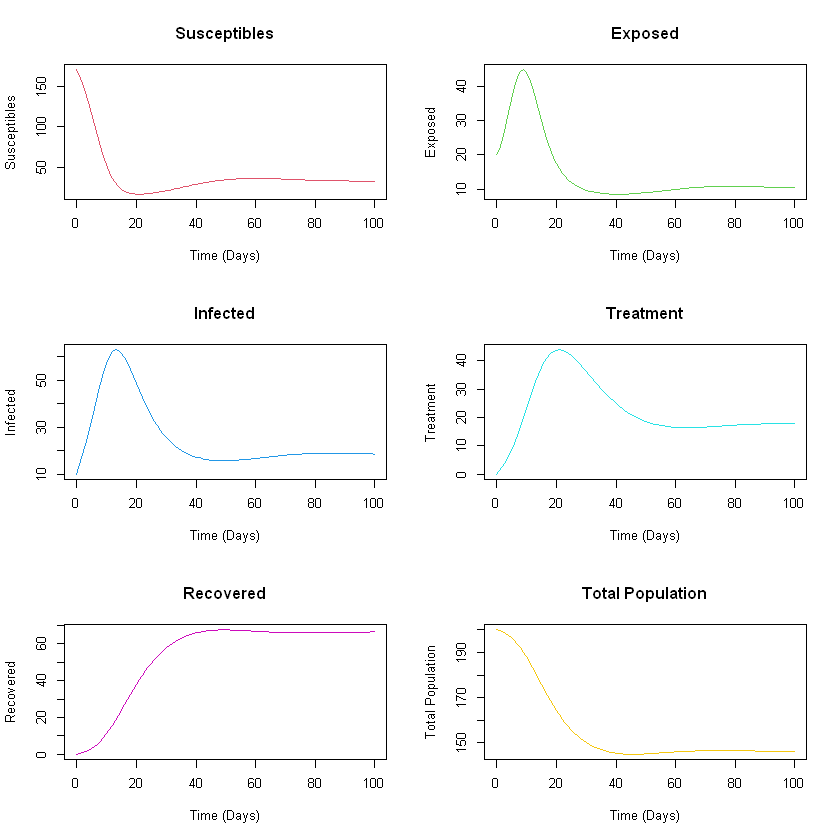

In [13]:
# Initial state
state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)

# Parameters
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)

# Time steps
times <- seq(0, 100, by = 1)

# Solve ODE
out <- ode(y = state, times = times, func = SEITR, parms = parameters)

# Plot each status separately
par(mfrow = c(3, 2))
plot(out[, "time"], out[, "S"], type = "l", col = 2, xlab = "Time (Days)", ylab = "Susceptibles", main = "Susceptibles")
plot(out[, "time"], out[, "E"], type = "l", col = 3, xlab = "Time (Days)", ylab = "Exposed", main = "Exposed")
plot(out[, "time"], out[, "I"], type = "l", col = 4, xlab = "Time (Days)", ylab = "Infected", main = "Infected")
plot(out[, "time"], out[, "Tt"], type = "l", col = 5, xlab = "Time (Days)", ylab = "Treatment", main = "Treatment")
plot(out[, "time"], out[, "R"], type = "l", col = 6, xlab = "Time (Days)", ylab = "Recovered", main = "Recovered")
plot(out[, "time"], out[, "N"], type = "l", col = 7, xlab = "Time (Days)", ylab = "Total Population", main = "Total Population")

[1] FALSE


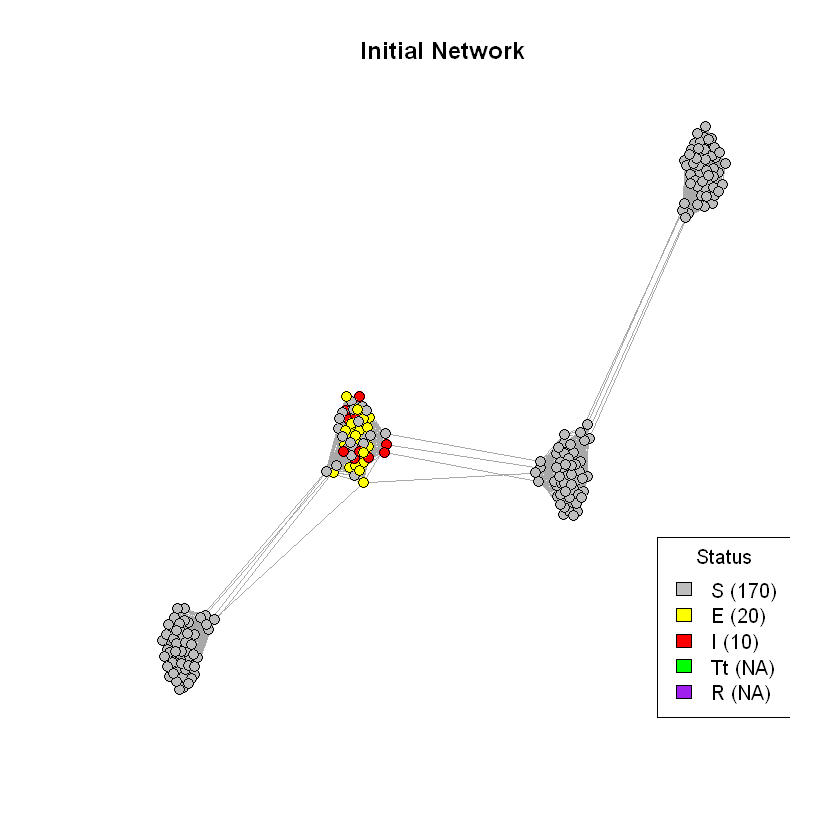

In [10]:
# Create the graph with 4 clusters and 50 nodes in each
npc <-50 # nodes per cluster
n_clust <- 4 # 4 clusters with 25 nodes each
matlist = list()
# Initialize the cluster vector
cluster_vector <- c()

for (i in 1:n_clust){ 
  matlist[[i]] = get.adjacency(erdos.renyi.game(npc, 0.7))
  
  # Assign each node in the current cluster to the cluster
  cluster_vector <- c(cluster_vector, rep(i, npc))
}

# merge clusters into one matrix
mat_clust <- bdiag(matlist)
k <- rowSums(mat_clust) 
print(any(k == 0))

node_vector <- seq(1,npc*n_clust)
for (i in node_vector){
  if (k[i]==0){ # if k=0, connect to something random
    j <- sample(node_vector[-i],1)
    mat_clust[i,j] <- 1
    mat_clust[j,i] <- 1
  }
}

g <- graph_from_adjacency_matrix(mat_clust, mode="undirected", diag=F)
comps <- components(g)
member_vec <- comps$membership
# daisy chain the components together
comp_ids <- seq(1,comps$no-1) # stop short of last one
for (curr_comp in comp_ids){
  # grab random nodes from consecutive components
  i <- sample(which(curr_comp==member_vec),1)
  j <- sample(which((curr_comp+1)==member_vec),1)
  
  # Determine the number of edges to add
  num_edges <- sample(1:5, 1)
  
  for (edge in 1:num_edges) {
    # Check if an edge already exists between the nodes
    if (!are_adjacent(g, i, j)) {
      # join them together
      mat_clust[i,j] <- 1
      mat_clust[j,i] <- 1
    }
    
    # Choose new nodes for the next edge
    i <- sample(which(curr_comp==member_vec),1)
    j <- sample(which((curr_comp+1)==member_vec),1)
  }
}

g <- graph_from_adjacency_matrix(mat_clust, mode="undirected", diag=F)
# Assign the cluster attribute to each vertex
V(g)$cluster <- cluster_vector

# Assign initial conditions to nodes
V(g)$label <- 1:n
V(g)$status <- "S"

# Select a cluster to initialize the infected and exposed nodes
init_cluster <- sample(1:n_clust, 1)

# Get the nodes in the selected cluster
init_cluster_nodes <- V(g)[member_vec == init_cluster]

# Randomly select nodes to be infected and exposed
init_I_nodes <- sample(init_cluster_nodes, I)
init_E_nodes <- sample(setdiff(init_cluster_nodes, init_I_nodes), E)

# Set the status of the selected nodes
V(g)[init_I_nodes]$status <- "I"
V(g)[init_E_nodes]$status <- "E"

# Initialize counters
S_count <- S
E_count <- E
I_count <- I
Tt_count <- Tt
R_count <- R
N_count <- N

# Initialize vectors to store metrics
degree_dist <- vector("list", length(times))
clustering_coeff <- numeric(length(times))
avg_path_length <- numeric(length(times))
largest_comp_size <- numeric(length(times))

# Color mapping for statuses
status_colors <- c("S" = "gray", "E" = "yellow", "I" = "red", "Tt" = "green", "R" = "purple")
par(mfrow = c(1, 1))

# Initial Network plot
plot(g, vertex.color = status_colors[V(g)$status], vertex.size=4, vertex.label="")
title(paste("Initial Network"))
status_counts <- table(V(g)$status)
status_labels <- paste(names(status_colors), " (", status_counts[names(status_colors)], ")", sep = "")
legend("bottomright", legend = status_labels, fill = status_colors, title = "Status")

Time 0 : Node 143 with status S removed
Time 0 : Node 46 with status S removed
Time 0 : Node 71 with status S removed
Time 0 : Node 129 with status E removed
Time 0 : New node 201 added with status S 
Time 0 : New node 202 added with status S 
Time 0 : New node 203 added with status S 
Time 0 : New node 204 added with status S 
Time 0 : Node 101 changed status from I to Tt
Time 0 : Node 106 changed status from S to E
Time 0 : Node 108 changed status from E to I
Time 0 : Node 110 changed status from E to I
Time 0 : Node 112 changed status from E to I
Time 0 : Node 114 changed status from E to I
Time 0 : Node 123 changed status from E to I
Time 0 : Node 131 changed status from E to I
Time 0 : Node 137 changed status from E to I
Time 0 : Node 139 changed status from E to I
Time 0 : Node 140 changed status from E to I
Time 0 : Node 141 changed status from E to I
Time 1 : Node 10 with status S removed
Time 1 : Node 198 with status S removed
Time 1 : Node 84 with status S removed
Time 1 : No

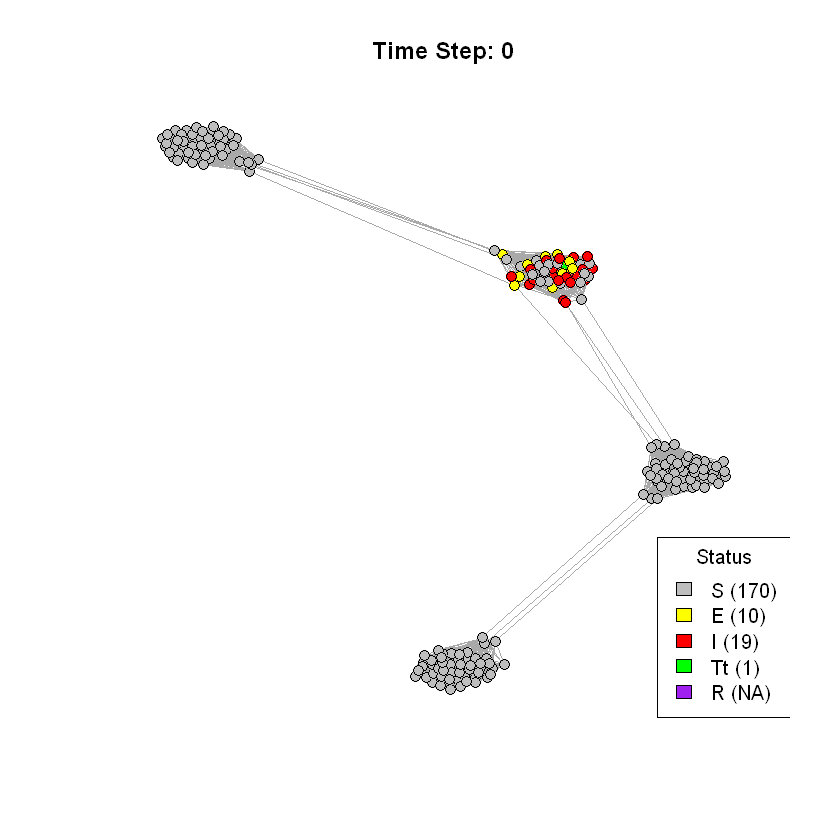

Time 11 : Node 141 with status I removed due to Infection
Time 11 : Node 69 with status S removed
Time 11 : Node 119 with status I removed
Time 11 : Node 224 with status S removed
Time 11 : Node 242 with status S removed
Time 11 : New node 245 added with status S 
Time 11 : New node 246 added with status S 
Time 11 : New node 247 added with status S 
Time 11 : New node 248 added with status S 
Time 11 : Node 101 changed status from Tt to R
Time 11 : Node 123 changed status from Tt to R
Time 11 : Node 125 changed status from I to R
Time 11 : Node 142 changed status from E to I
Time 12 : Node 54 with status S removed
Time 12 : Node 219 with status E removed
Time 12 : Node 205 with status S removed
Time 12 : Node 183 with status S removed
Time 12 : New node 249 added with status S 
Time 12 : New node 250 added with status S 
Time 12 : New node 251 added with status S 
Time 12 : New node 252 added with status S 
Time 12 : Node 109 changed status from Tt to R
Time 12 : Node 110 changed stat

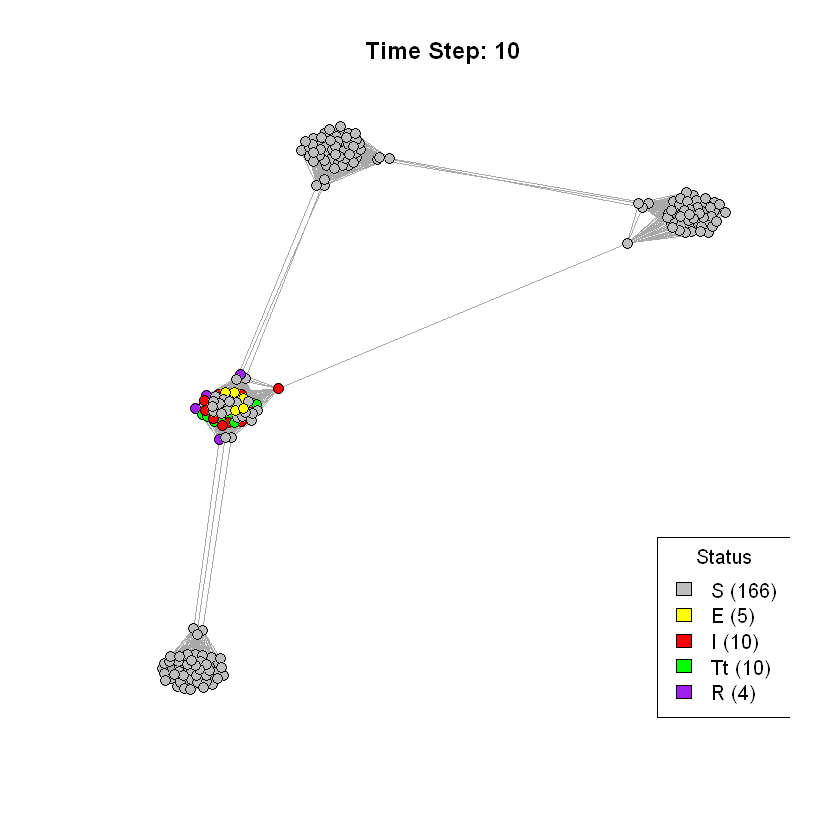

Time 21 : Node 156 with status S removed
Time 21 : Node 204 with status S removed
Time 21 : Node 278 with status S removed
Time 21 : Node 206 with status I removed
Time 21 : New node 285 added with status S 
Time 21 : New node 286 added with status S 
Time 21 : New node 287 added with status S 
Time 21 : New node 288 added with status S 
Time 21 : Node 139 changed status from Tt to R
Time 21 : Node 150 changed status from I to Tt
Time 22 : Node 16 with status S removed
Time 22 : Node 148 with status I removed
Time 22 : Node 117 with status Tt removed
Time 22 : Node 30 with status S removed
Time 22 : New node 289 added with status S 
Time 22 : New node 290 added with status S 
Time 22 : New node 291 added with status S 
Time 22 : New node 292 added with status S 
Time 22 : Node 110 changed status from Tt to R
Time 22 : Node 136 changed status from I to Tt
Time 22 : Node 243 changed status from I to Tt
Time 22 : Node 286 changed status from S to E
Time 23 : Node 235 with status I removed

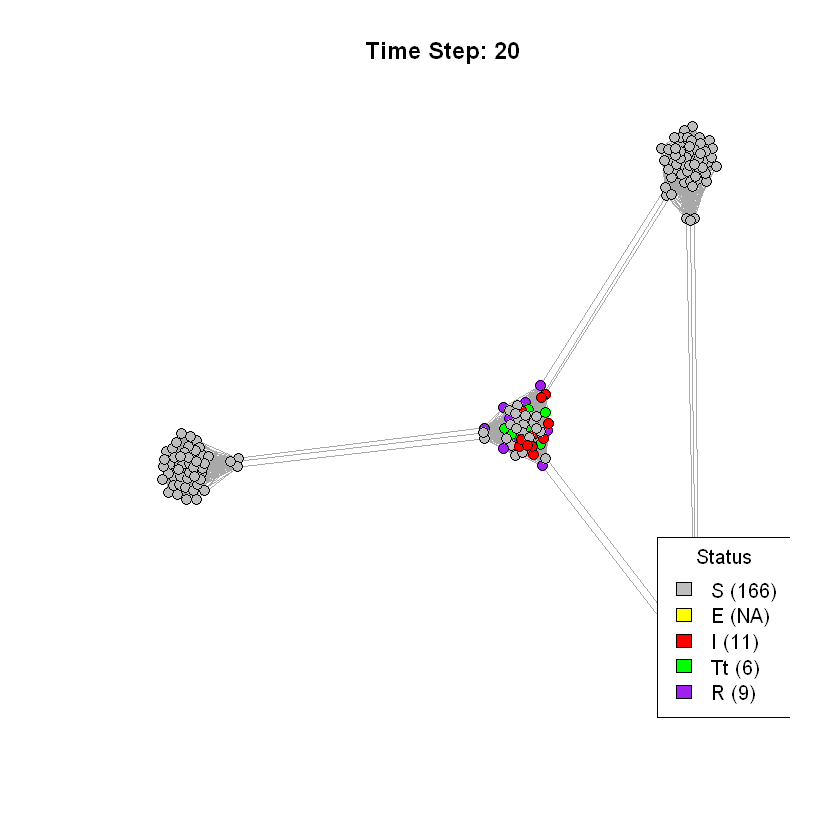

Time 31 : Node 182 with status S removed
Time 31 : Node 47 with status S removed
Time 31 : Node 191 with status S removed
Time 31 : Node 245 with status S removed
Time 31 : New node 325 added with status S 
Time 31 : New node 326 added with status S 
Time 31 : New node 327 added with status S 
Time 31 : New node 328 added with status S 
Time 31 : Node 53 changed status from S to E
Time 31 : Node 56 changed status from S to E
Time 31 : Node 77 changed status from E to I
Time 31 : Node 82 changed status from S to E
Time 31 : Node 97 changed status from E to I
Time 31 : Node 100 changed status from E to I
Time 31 : Node 135 changed status from E to I
Time 31 : Node 237 changed status from S to E
Time 32 : Node 85 with status S removed
Time 32 : Node 326 with status S removed
Time 32 : Node 317 with status S removed
Time 32 : Node 31 with status S removed
Time 32 : New node 329 added with status S 
Time 32 : New node 330 added with status S 
Time 32 : New node 331 added with status S 
Time

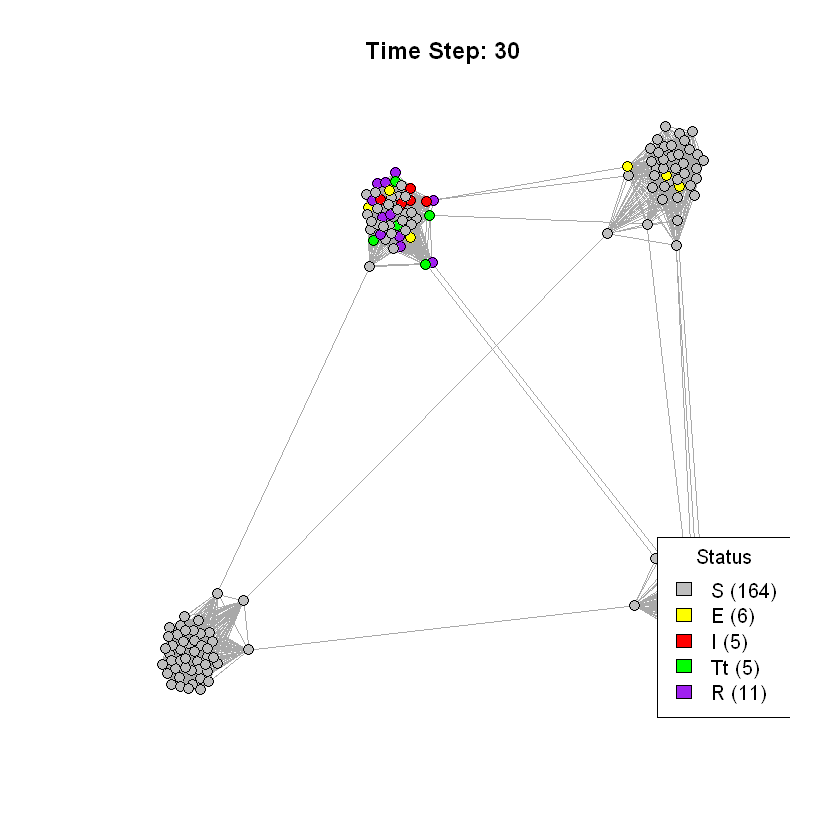

Time 41 : Node 171 with status I removed due to Infection
Time 41 : Node 77 with status Tt removed
Time 41 : Node 64 with status S removed
Time 41 : Node 358 with status S removed
Time 41 : Node 51 with status S removed
Time 41 : New node 365 added with status S 
Time 41 : New node 366 added with status S 
Time 41 : New node 367 added with status S 
Time 41 : New node 368 added with status S 
Time 41 : Node 52 changed status from E to I
Time 41 : Node 60 changed status from S to E
Time 41 : Node 159 changed status from S to E
Time 41 : Node 164 changed status from S to E
Time 41 : Node 314 changed status from E to I
Time 41 : Node 318 changed status from E to I
Time 41 : Node 345 changed status from S to E
Time 41 : Node 365 changed status from S to E
Time 42 : Node 305 with status S removed
Time 42 : Node 282 with status S removed
Time 42 : Node 345 with status E removed
Time 42 : Node 275 with status S removed
Time 42 : New node 369 added with status S 
Time 42 : New node 370 added w

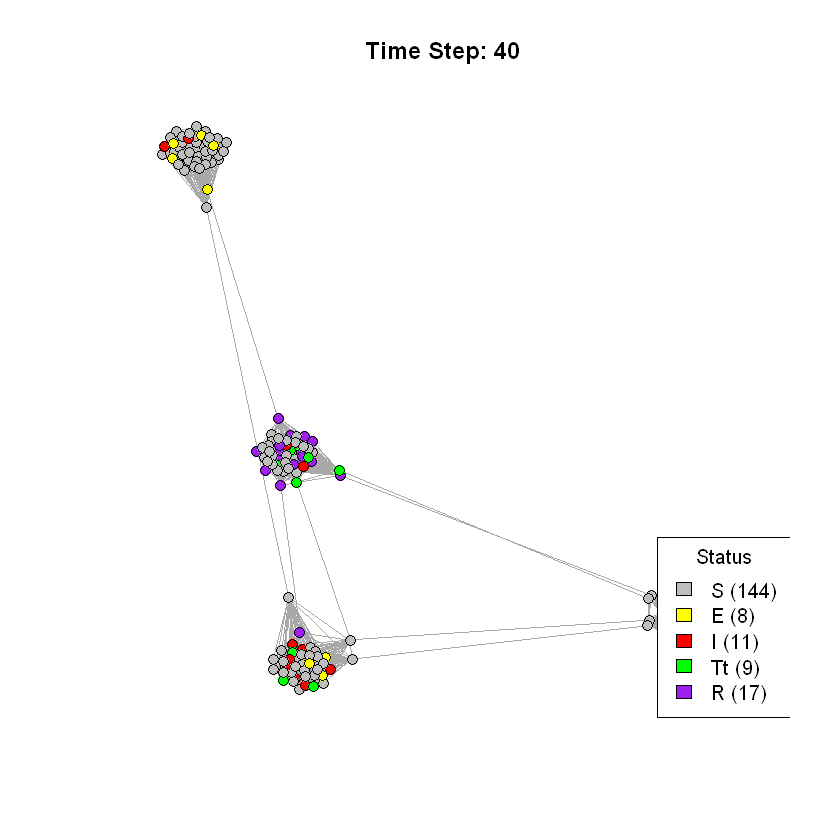

Time 51 : Node 391 with status I removed due to Infection
Time 51 : Node 180 with status S removed
Time 51 : Node 284 with status S removed
Time 51 : Node 250 with status S removed
Time 51 : Node 385 with status S removed
Time 51 : New node 405 added with status S 
Time 51 : New node 406 added with status S 
Time 51 : New node 407 added with status S 
Time 51 : New node 408 added with status S 
Time 51 : Node 78 changed status from E to I
Time 51 : Node 82 changed status from Tt to R
Time 51 : Node 176 changed status from S to E
Time 51 : Node 277 changed status from I to R
Time 51 : Node 287 changed status from E to I
Time 51 : Node 308 changed status from I to Tt
Time 51 : Node 309 changed status from Tt to R
Time 51 : Node 312 changed status from I to R
Time 52 : Node 379 with status I removed
Time 52 : Node 277 with status R removed
Time 52 : Node 306 with status R removed
Time 52 : Node 371 with status S removed
Time 52 : New node 409 added with status S 
Time 52 : New node 410 ad

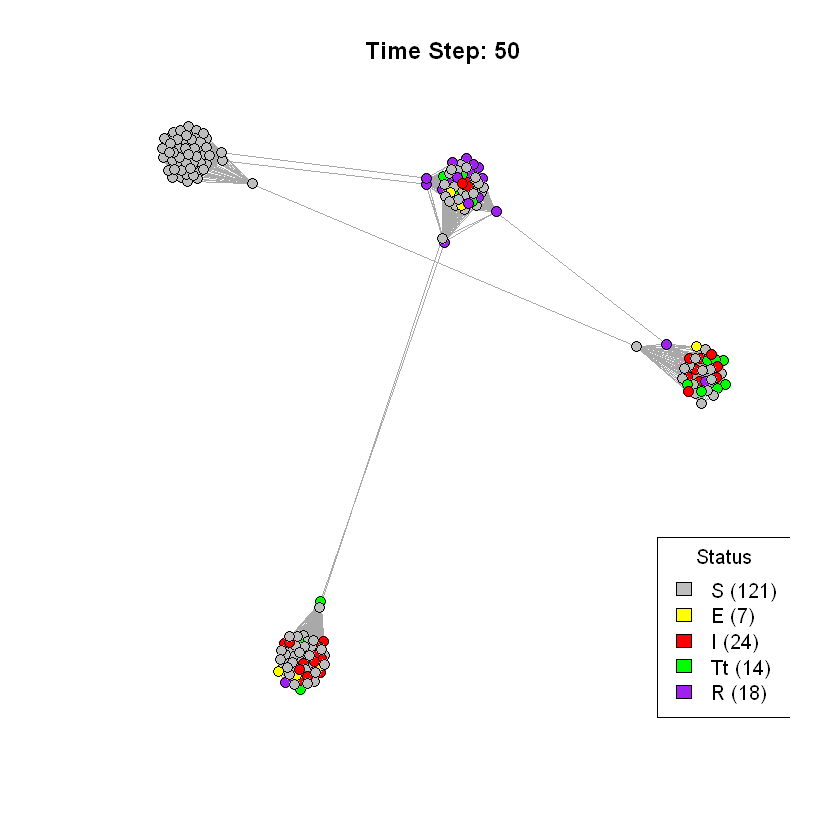

Time 61 : Node 421 with status E removed
Time 61 : Node 416 with status S removed
Time 61 : Node 281 with status S removed
Time 61 : Node 362 with status S removed
Time 61 : New node 445 added with status S 
Time 61 : New node 446 added with status S 
Time 61 : New node 447 added with status S 
Time 61 : New node 448 added with status S 
Time 61 : Node 99 changed status from E to I
Time 61 : Node 160 changed status from I to Tt
Time 61 : Node 366 changed status from E to I
Time 61 : Node 423 changed status from E to I
Time 61 : Node 438 changed status from S to E
Time 62 : Node 409 with status I removed due to Infection
Time 62 : Node 276 with status S removed
Time 62 : Node 328 with status S removed
Time 62 : Node 348 with status Tt removed
Time 62 : Node 159 with status R removed
Time 62 : New node 449 added with status S 
Time 62 : New node 450 added with status S 
Time 62 : New node 451 added with status S 
Time 62 : New node 452 added with status S 
Time 62 : Node 168 changed stat

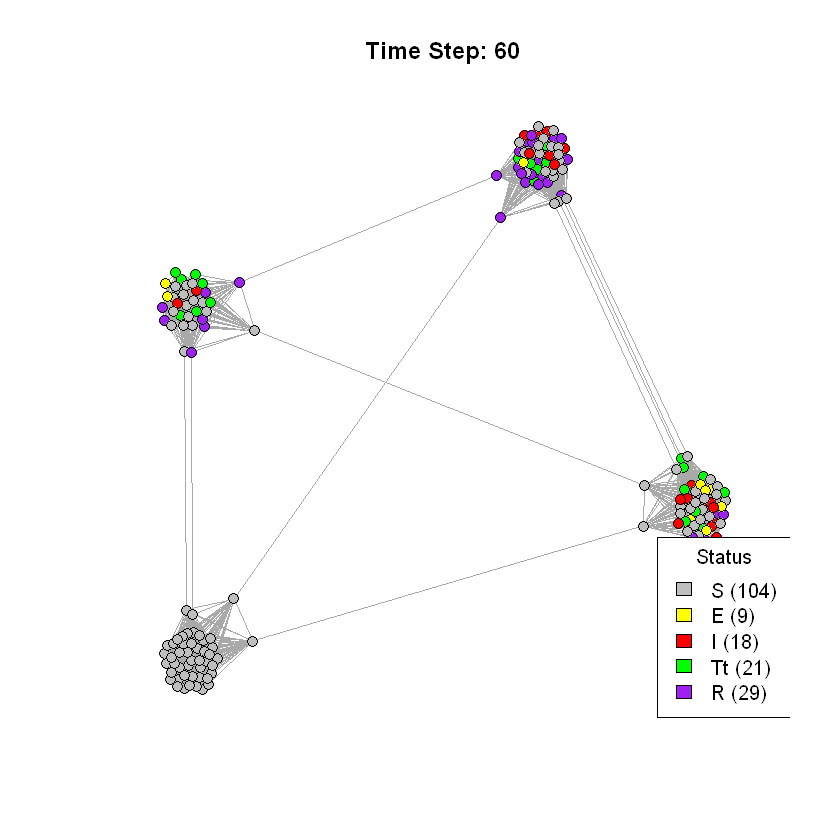

Time 71 : Node 370 with status I removed due to Infection
Time 71 : Node 20 with status S removed
Time 71 : Node 23 with status S removed
Time 71 : Node 333 with status S removed
Time 71 : Node 395 with status S removed
Time 71 : New node 485 added with status S 
Time 71 : New node 486 added with status S 
Time 71 : New node 487 added with status S 
Time 71 : New node 488 added with status S 
Time 71 : Node 292 changed status from I to Tt
Time 71 : Node 470 changed status from E to I
Time 72 : Node 432 with status I removed due to Infection
Time 72 : Node 350 with status R removed
Time 72 : Node 338 with status R removed
Time 72 : Node 150 with status R removed
Time 72 : Node 27 with status S removed
Time 72 : New node 489 added with status S 
Time 72 : New node 490 added with status S 
Time 72 : New node 491 added with status S 
Time 72 : New node 492 added with status S 
Time 72 : Node 330 changed status from I to Tt
Time 72 : Node 337 changed status from Tt to R
Time 72 : Node 355 c

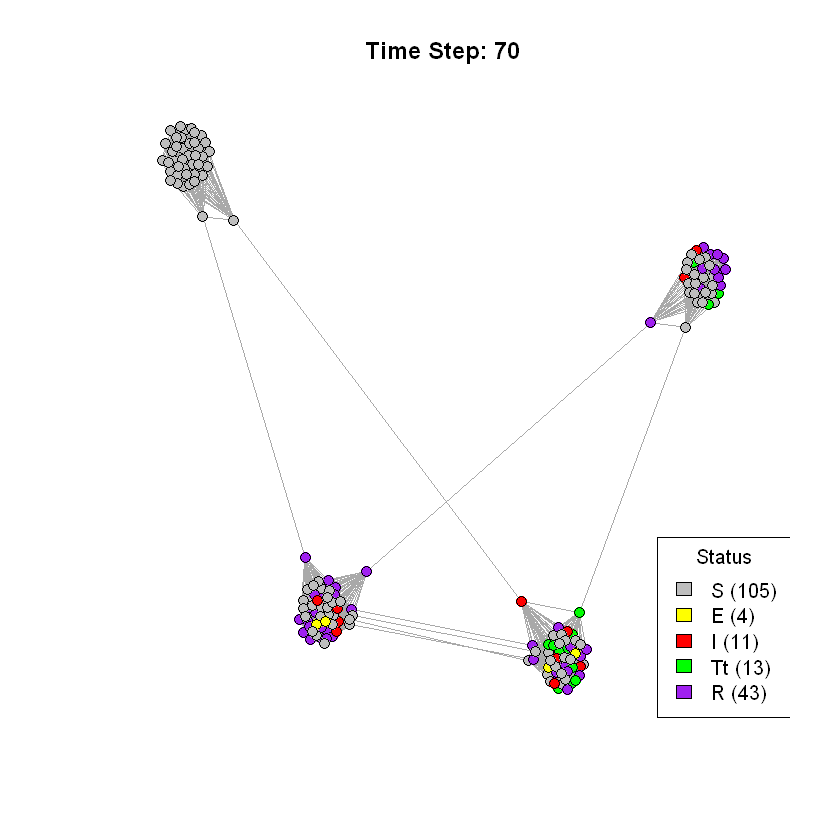

Time 81 : Node 520 with status S removed
Time 81 : Node 399 with status R removed
Time 81 : Node 514 with status S removed
Time 81 : Node 462 with status E removed
Time 81 : New node 525 added with status S 
Time 81 : New node 526 added with status S 
Time 81 : New node 527 added with status S 
Time 81 : New node 528 added with status S 
Time 81 : Node 153 changed status from S to E
Time 81 : Node 428 changed status from I to Tt
Time 81 : Node 434 changed status from S to E
Time 81 : Node 496 changed status from I to Tt
Time 81 : Node 504 changed status from E to I
Time 81 : Node 512 changed status from E to I
Time 82 : Node 392 with status I removed due to Infection
Time 82 : Node 501 with status S removed
Time 82 : Node 61 with status R removed
Time 82 : Node 509 with status S removed
Time 82 : Node 470 with status Tt removed
Time 82 : New node 529 added with status S 
Time 82 : New node 530 added with status S 
Time 82 : New node 531 added with status S 
Time 82 : New node 532 added

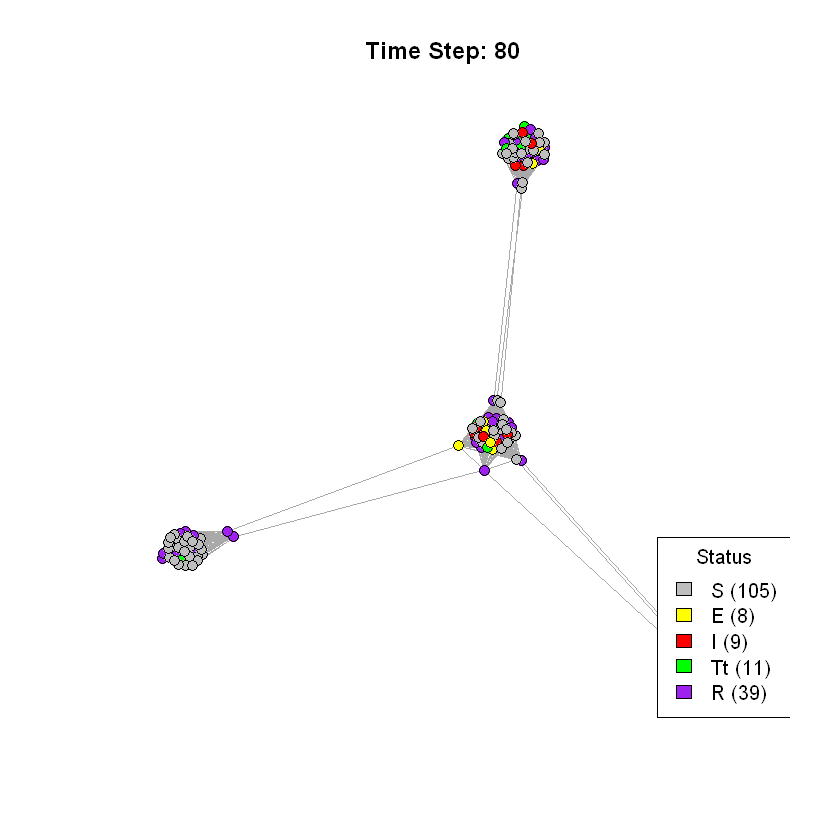

Time 91 : Node 533 with status S removed
Time 91 : Node 563 with status S removed
Time 91 : Node 511 with status S removed
Time 91 : Node 472 with status S removed
Time 91 : New node 565 added with status S 
Time 91 : New node 566 added with status S 
Time 91 : New node 567 added with status S 
Time 91 : New node 568 added with status S 
Time 91 : Node 411 changed status from I to Tt
Time 91 : Node 438 changed status from Tt to R
Time 92 : Node 490 with status S removed
Time 92 : Node 384 with status S removed
Time 92 : Node 228 with status S removed
Time 92 : Node 438 with status R removed
Time 92 : New node 569 added with status S 
Time 92 : New node 570 added with status S 
Time 92 : New node 571 added with status S 
Time 92 : New node 572 added with status S 
Time 92 : Node 413 changed status from E to I
Time 92 : Node 434 changed status from I to R
Time 92 : Node 497 changed status from I to Tt
Time 92 : Node 513 changed status from E to I
Time 92 : Node 549 changed status from E 

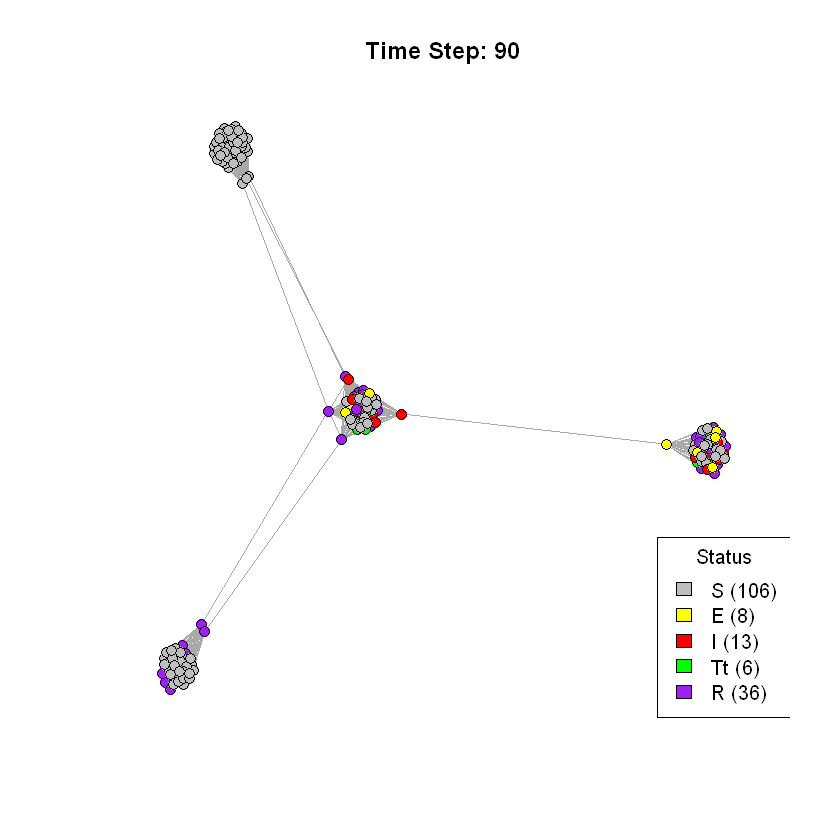

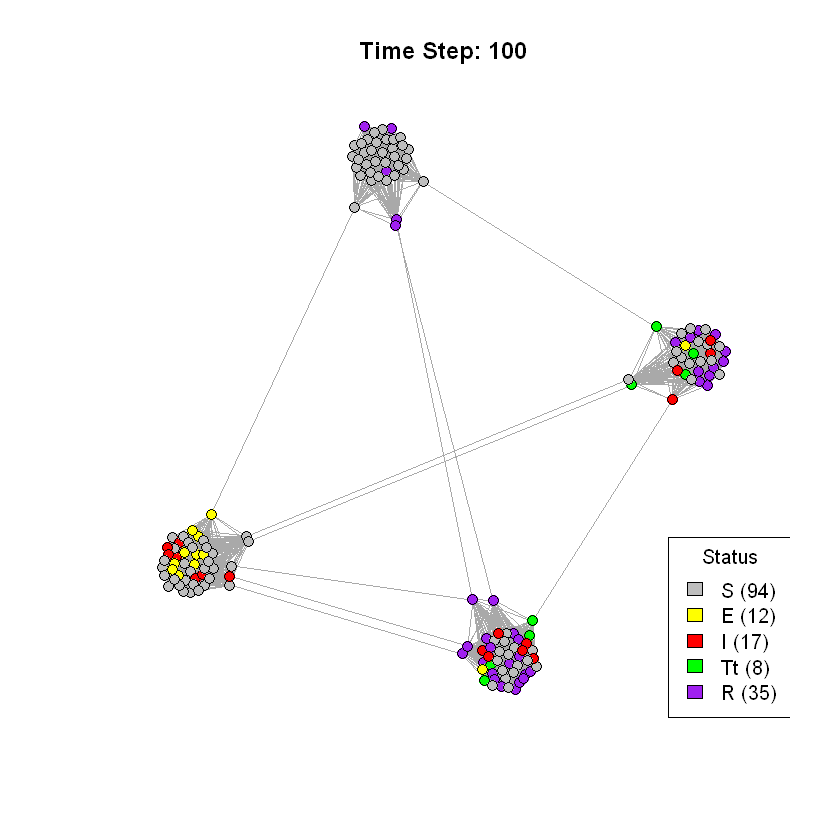

In [11]:
# Initialize a counter for the node labels
node_counter <- vcount(g)

# Iterate over time steps
for (t in times) {
  # Save old statuses for tracking changes
  old_status <- V(g)$status
  
  # Remove nodes deceased due to Infection (count = delta_I * I)
  nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
  nodes_with_status_I <- which(V(g)$status == "I")
  
  # Check if the number of nodes to remove is less than 1
  if (nodes_to_remove_count < 1) {
    # Generate a random number between 0 and 1
    random_number <- runif(1)
    
    # Check if the random number is greater than nodes_to_remove_count
    if (random_number < nodes_to_remove_count) {
      node_to_remove <- sample(nodes_with_status_I, 1)
      
      # Print node to be removed
      cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed due to Infection\n")
      
      # Remove the selected node
      g <- delete_vertices(g, node_to_remove)
    }
  } else {
    for (i in 1:nodes_to_remove_count){
      node_to_remove <- sample(nodes_with_status_I, 1)
      
      # Print node to be removed
      cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed due to Infection\n")
      
      # Remove the selected node
      g <- delete_vertices(g, node_to_remove)
    }
  }
  
  # Remove nodes for deceased (count = mu * N)
  for (i in 1:(mu * N)) {
    node_to_remove <- sample(vcount(g), 1)
    
    # Print node to be removed
    cat("Time", t, ": Node", V(g)[node_to_remove]$label, "with status", V(g)[node_to_remove]$status, "removed\n")
    
    # Remove node from graph
    g <- delete_vertices(g, node_to_remove)
  }
  
  # Add new nodes to the network (count = Lambda)
  for (i in 1:(Lambda)) {
    node_counter <- node_counter + 1
    new_status <- "S"
    new_label <- node_counter
    
    g <- add_vertices(g, 1)
    V(g)[vcount(g)]$status <- new_status
    V(g)[vcount(g)]$label <- new_label
    
    # Assign new node to a cluster
    new_cluster <- sample(1:n_clust, 1)
    V(g)[vcount(g)]$cluster <- new_cluster  # Assign the new node to a cluster
    
    # Get the nodes in the same cluster
    same_cluster_nodes <- V(g)[V(g)$cluster == new_cluster]
    
    # Calculate the probability of attaching to each node in the same cluster
    prob_same_cluster <- degree(g, v = same_cluster_nodes, mode = "all") / sum(degree(g, v = same_cluster_nodes, mode = "all"))
    
    # Determine the number of nodes to attach
    num_nodes_to_attach <- min(sum(prob_same_cluster > 0), round(avg_degree))
    
    # Choose nodes to attach to within the same cluster
    nodes_to_attach_same_cluster <- sample(same_cluster_nodes, size = num_nodes_to_attach, prob = prob_same_cluster)
    
    # Add edges to these nodes
    for (node_to_attach in nodes_to_attach_same_cluster) {
      if (V(g)[node_to_attach]$label != new_label) { # No self edges
        g <- add_edges(g, c(vcount(g), node_to_attach))
      }
    }
    
    # With a small probability, add an edge to a node in a different cluster
    if (runif(1) < 0.1) { # Adjust this probability as needed
      different_cluster_nodes <- V(g)[V(g)$cluster != new_cluster]
      if(length(different_cluster_nodes) > 0) {
        node_to_attach_different_cluster <- sample(different_cluster_nodes, 1)
        g <- add_edges(g, c(vcount(g), node_to_attach_different_cluster))
      }
    }
    
    # Print new node
    cat("Time", t, ": New node", new_label, "added with status", new_status, "\n")
  }
  
  # Iterate over nodes for status changes
  for (i in V(g)) {
    # Get current status
    status <- V(g)[i]$status
    
    # Generate a random number
    rand <- runif(1)
    
    # Update status based on model parameters and current status
    if (status == "S") {
      # Get the statuses of the node's neighbors
      neighbor_statuses <- V(g)[neighbors(g, i)]$status
      # Check if any neighbor is E or I and rnd < beta1 * I / N
      if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
        V(g)[i]$status <- "E"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from S to E\n")
      }
    } # Else if status = E, check if rnd < beta2 
    else if (status == "E" && rand < beta2) {
      V(g)[i]$status <- "I"
      cat("Time", t, ": Node", V(g)[i]$label, "changed status from E to I\n")
    } # Else if status = I, check if rnd < beta3, else if rnd < alpha1  
    else if (status == "I") {
      if (rand < beta3) {
        V(g)[i]$status <- "R"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from I to R\n")
      } else if (rand < alpha1) {
        V(g)[i]$status <- "Tt"
        cat("Time", t, ": Node", V(g)[i]$label, "changed status from I to Tt\n")
      }
    } # Else if status = Tt, check if rnd < alpha2 
    else if (status == "Tt" && rand < alpha2) {
      V(g)[i]$status <- "R"
      cat("Time", t, ": Node", V(g)[i]$label, "changed status from Tt to R\n")
    }
  }
  
  # Store counts
  S_count[t+1] <- sum(V(g)$status == "S")
  E_count[t+1] <- sum(V(g)$status == "E")
  I_count[t+1] <- sum(V(g)$status == "I")
  Tt_count[t+1] <- sum(V(g)$status == "Tt")
  R_count[t+1] <- sum(V(g)$status == "R")
  N_count[t+1] <- vcount(g)
  
  # Calculate and store metrics
  degree_dist[[t+1]] <- degree_distribution(g)
  clustering_coeff[t+1] <- transitivity(g, type = "global")
  avg_path_length[t+1] <- mean_distance(g, directed = FALSE)
  comps <- components(g)
  largest_comp_size[t+1] <- max(comps$csize)
  
  # Plot network in every 10th time step
  if (t %% 10 == 0) {
    plot(g, vertex.color = status_colors[V(g)$status], vertex.size=4, vertex.label="")
    title(paste("Time Step:", t))
    status_counts <- table(V(g)$status)
    status_labels <- paste(names(status_colors), " (", status_counts[names(status_colors)], ")", sep = "")
    legend("bottomright", legend = status_labels, fill = status_colors, title = "Status")
  }
}

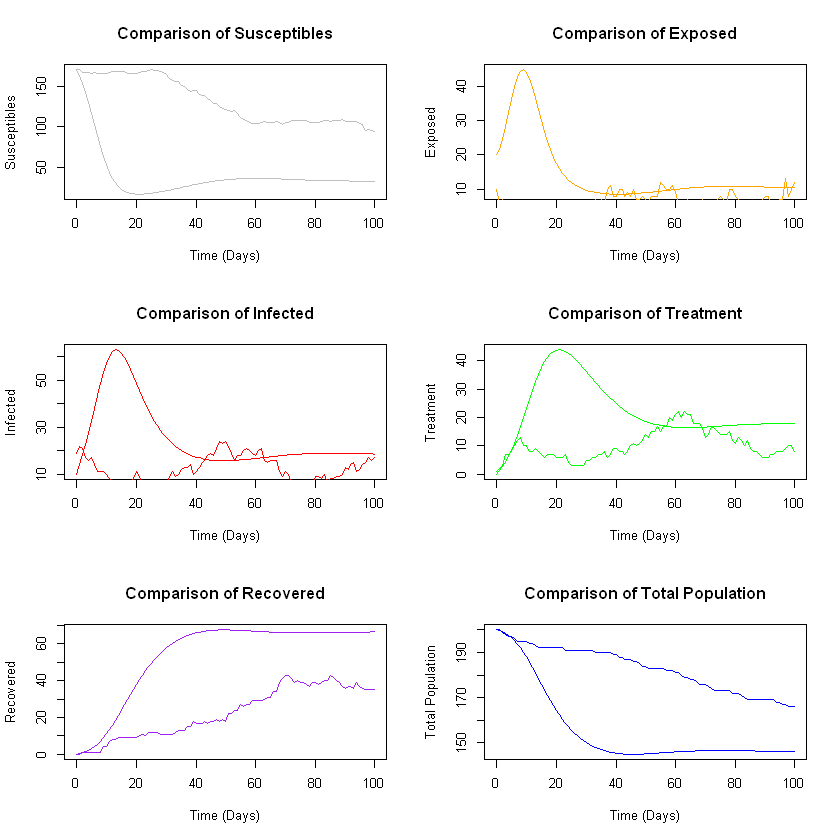

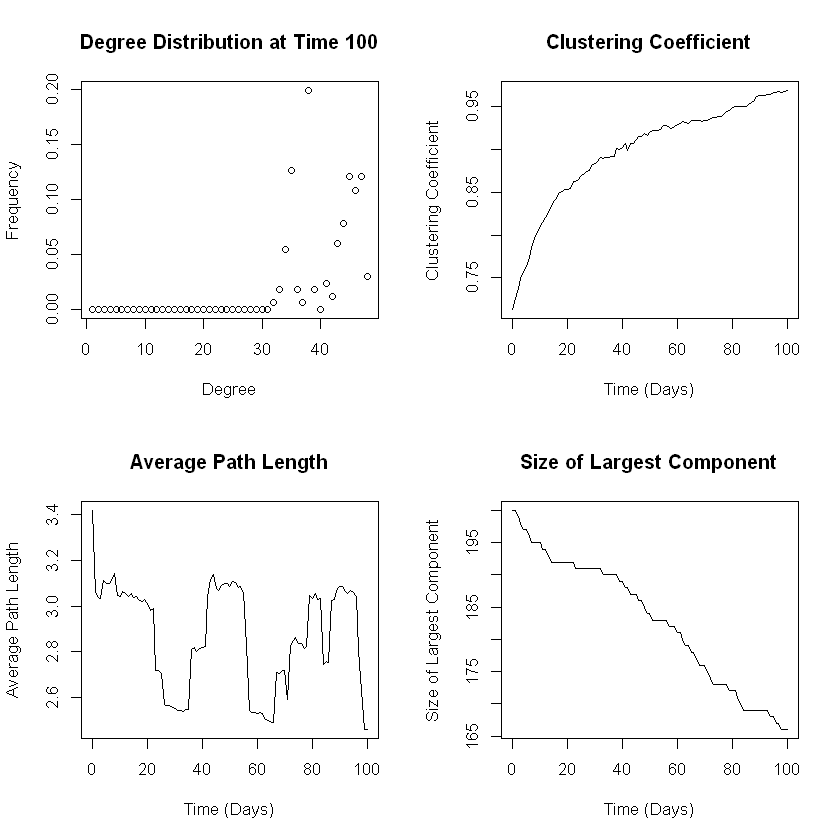

In [14]:
# Set up a single plot for comparison
par(mfrow = c(3, 2))
plot(out[, "time"], out[, "S"], type = "l", col = status_colors["S"], xlab = "Time (Days)", ylab = "Susceptibles", main = "Comparison of Susceptibles")
lines(times, S_count, col = status_colors["S"])
plot(out[, "time"], out[, "E"], type = "l", col = "orange", xlab = "Time (Days)", ylab = "Exposed", main = "Comparison of Exposed")
lines(times, E_count, col = "orange")
plot(out[, "time"], out[, "I"], type = "l", col = status_colors["I"], xlab = "Time (Days)", ylab = "Infected", main = "Comparison of Infected")
lines(times, I_count, col = status_colors["I"])
plot(out[, "time"], out[, "Tt"], type = "l", col = status_colors["Tt"], xlab = "Time (Days)", ylab = "Treatment", main = "Comparison of Treatment")
lines(times, Tt_count, col = status_colors["Tt"])
plot(out[, "time"], out[, "R"], type = "l", col = status_colors["R"], xlab = "Time (Days)", ylab = "Recovered", main = "Comparison of Recovered")
lines(times, R_count, col = status_colors["R"])
plot(out[, "time"], out[, "N"], type = "l", col = "blue", xlab = "Time (Days)", ylab = "Total Population", main = "Comparison of Total Population")
lines(times, N_count, col = "blue")

# Plot metrics
par(mfrow = c(2, 2))
plot(degree_dist[[t+1]], main = paste("Degree Distribution at Time", t), xlab = "Degree", ylab = "Frequency")
plot(times, clustering_coeff, type = "l", xlab = "Time (Days)", ylab = "Clustering Coefficient", main = "Clustering Coefficient")
plot(times, avg_path_length, type = "l", xlab = "Time (Days)", ylab = "Average Path Length", main = "Average Path Length")
plot(times, largest_comp_size, type = "l", xlab = "Time (Days)", ylab = "Size of Largest Component", main = "Size of Largest Component")

### Experiment with multiple networks
In our first two experiments, we applied the SEITR model to two different network graphs separately and explained the results. As we stated previously, due to the stochastic nature of the network creation and status changes, the results are expected to be different for each run. In order to understand the behavior of our model, we repeated the experiment several times for these two network types and plotted the results together. An important side note here is, these experiments become computationally very expensive as the network size, number of time steps, the birth rate (adding node is computationally most expensive part of our experiment due to sampling) and some other factors. To conduct the experiment in computationally challenging conditions, we adopted parallelization methods for the remaining experiments.

In the third experiment, the first experiment was repeated six times in parallel. This allowed us to observe the variability in the disease dynamics due to the stochastic nature of the model and the random generation of the Erdős–Rényi graphs. The initial conditions were set as follows: 150 Susceptible, 20 Infected, and 30 Exposed individuals. The model parameters were set to Lambda = 2, beta1 = 0.8, beta2 = 0.3, beta3 = 0.02, alpha1 = 0.1, alpha2 = 0.055, delta\_I = 0.03, delta\_T = 0.03, and mu = 0.01. The Erdős–Rényi graphs were generated with 200 nodes and a connection probability of 0.9. We decreased the birth rate Lambda and death rate mu for this experiment to make the computation easier.

In the fourth experiment, the second experiment was repeated six times in parallel. This allowed us to observe the variability in the disease dynamics due to the stochastic nature of the model and the random generation of the weakly connected clusters. The initial conditions were set as follows: 350 Susceptible, 20 Infected, and 30 Exposed individuals. The model parameters were set to Lambda = 2, beta1 = 0.8, beta2 = 0.3, beta3 = 0.02, alpha1 = 0.1, alpha2 = 0.055, delta\_I = 0.03, delta\_T = 0.03, and mu = 0.01. The graph consisted of five clusters, each with 80 nodes, generated using the Erdős–Rényi model with a connection probability of 0.8.

In the third and fourth experiments, we conducted multiple runs of the first and second experiments in parallel to observe the variability in the disease dynamics. These parallelized experiments provided a more robust understanding of the model’s behavior under various conditions and network structures. They demonstrated that while the model parameters and initial conditions play a crucial role in determining the disease dynamics, the outcomes can also be significantly influenced by the network structure and the inherent randomness in disease transmission and network generation. Comparing the variance amongst the network results between third (figure \ref{fig:g100pres}) and fourth (figure \ref{fig:g200pres}) experiment shows the network structure can dramatically affect the results. The third experiment results are very similar, there is not much variance between different runs, on the other hand, the network with weakly connected clusters caused a lot of variance between results. These findings underscore the importance of considering these factors when using the SEITR model to study disease spread in real-world populations.

In [19]:
Lambda <- 2
beta1 <- 0.8
beta2 <- 0.3
beta3 <- 0.02
alpha1 <- 0.1
alpha2 <- 0.055
delta_I <- 0.03
delta_T <- 0.03
mu <- 0.01

R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

n <- 200
S <- 150
I <- 20
E <- 30
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)
times <- seq(0, 100, by = 1)
out <- ode(y = state, times = times, func = SEITR, parms = parameters)
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 6  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)
status_counts_list <- foreach(run = 1:6, .packages = c("igraph", "deSolve")) %dopar% {
  g <- erdos.renyi.game(n, 0.9)
  V(g)$label <- 1:n
  V(g)$status <- "S"
  V(g)$status[sample(1:n, size = I)] <- "I"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status == "I")), size = E)] <- "E"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E"))), size = Tt)] <- "Tt"
  V(g)$status[sample(setdiff(1:n, which(V(g)$status %in% c("I", "E", "Tt"))), size = R)] <- "R"
  S_count <- sum(V(g)$status == "S")
  I_count <- sum(V(g)$status == "I")
  E_count <- sum(V(g)$status == "E")
  Tt_count <- sum(V(g)$status == "Tt")
  R_count <- sum(V(g)$status == "R")
  N_count <- vcount(g)
  status_counts <- list()
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

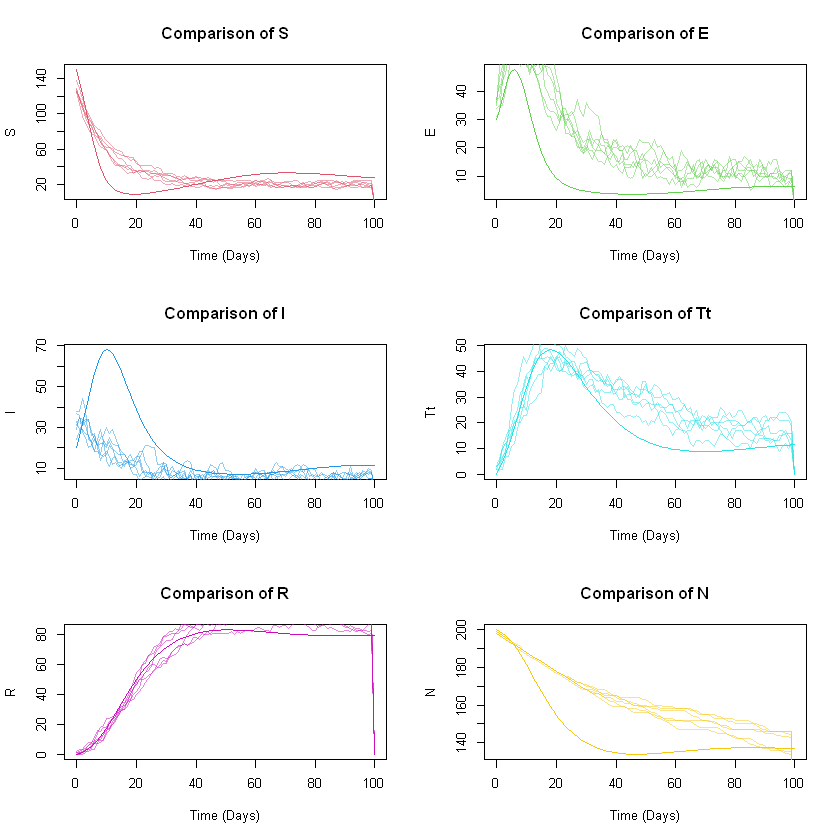

In [20]:
par(mfrow = c(3, 2))
statuses <- c("S", "E", "I", "Tt", "R", "N")
colors <- c(2, 3, 4, 5, 6, 7)
colors_alpha <- sapply(colors, function(col) rgb(red = col2rgb(col)[1,]/255, green = col2rgb(col)[2,]/255, blue = col2rgb(col)[3,]/255, alpha = 0.5))
for (j in 1:length(statuses)) {
  plot(out[, "time"], out[, statuses[j]], type = "l", col = colors[j], xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]))
  for (i in 1:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
    }
    lines(times, counts, col = colors_alpha[j])
  }
}

In [22]:
Lambda <- 2
beta1 <- 0.8
beta2 <- 0.3
beta3 <- 0.02
alpha1 <- 0.1
alpha2 <- 0.055
delta_I <- 0.03
delta_T <- 0.03
mu <- 0.01

R0 <- (beta1 * beta2) / ((beta3 + mu + delta_I + alpha1) * (beta2 + mu) * (mu + delta_T + alpha2))

n <- 400
S <- 350
I <- 20
E <- 30
R <- 0
Tt <- 0
N <- S + E + I + R + Tt

state <- c(S = S, E = E, I = I, Tt = Tt, R = R, N = n)
parameters <- c(Lambda = Lambda, beta1 = beta1, beta2 = beta2, beta3 = beta3, alpha1 = alpha1, alpha2 = alpha2, delta_I = delta_I, delta_T = delta_T, mu = mu)
times <- seq(0, 62, by = 1)
out <- ode(y = state, times = times, func = SEITR, parms = parameters)
node_counter <- vcount(g)
status_counts_list <- list()
num_cores <- 6  # Adjust the number of cores based on your machine's capabilities
cl <- makeCluster(num_cores)
registerDoParallel(cl)

status_counts_list <- foreach(run = 1:6, .packages = c("igraph", "deSolve", "Matrix")) %dopar% {
  print(run)
  npc <-80 # nodes per cluster
  n_clust <- 5 # 4 clusters with 25 nodes each
  matlist = list()
  cluster_vector <- c()
  
  for (i in 1:n_clust){ 
    matlist[[i]] = get.adjacency(erdos.renyi.game(npc, 0.8))
    cluster_vector <- c(cluster_vector, rep(i, npc))
  }
  mat_clust <- bdiag(matlist)
  k <- rowSums(mat_clust) 
  print(any(k == 0))
  node_vector <- seq(1,npc*n_clust)
  for (i in node_vector){
    if (k[i]==0){ # if k=0, connect to something random
      j <- sample(node_vector[-i],1)
      mat_clust[i,j] <- 1
      mat_clust[j,i] <- 1
    }
  }
  g <- graph_from_adjacency_matrix(mat_clust, mode="undirected", diag=F)
  comps <- components(g)
  member_vec <- comps$membership
  comp_ids <- seq(1,comps$no-1) # stop short of last one
  for (curr_comp in comp_ids){
    i <- sample(which(curr_comp==member_vec),1)
    j <- sample(which((curr_comp+1)==member_vec),1)
    num_edges <- sample(1:4, 1)
    
    for (edge in 1:num_edges) {
      if (!are_adjacent(g, i, j)) {
        mat_clust[i,j] <- 1
        mat_clust[j,i] <- 1
      }
      i <- sample(which(curr_comp==member_vec),1)
      j <- sample(which((curr_comp+1)==member_vec),1)
    }
  }
  g <- graph_from_adjacency_matrix(mat_clust, mode="undirected", diag=F)
  V(g)$cluster <- cluster_vector
  V(g)$label <- 1:n
  V(g)$status <- "S"
  init_cluster <- sample(1:n_clust, 1)
  init_cluster_nodes <- V(g)[member_vec == init_cluster]
  init_I_nodes <- sample(init_cluster_nodes, I)
  init_E_nodes <- sample(setdiff(init_cluster_nodes, init_I_nodes), E)
  V(g)[init_I_nodes]$status <- "I"
  V(g)[init_E_nodes]$status <- "E"
  S_count <- S
  E_count <- E
  I_count <- I
  Tt_count <- Tt
  R_count <- R
  N_count <- N
  status_counts <- list()
  plot(g, vertex.color = status_colors[V(g)$status], vertex.size=4, vertex.label="")
  
  for (t in times) {
    old_status <- V(g)$status
    
    nodes_to_remove_count <- delta_I * sum(V(g)$status == "I")
    nodes_with_status_I <- which(V(g)$status == "I")
    if (nodes_to_remove_count < 1) {
      random_number <- runif(1)
      if (random_number < nodes_to_remove_count) {
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    } else {
      for (i in 1:nodes_to_remove_count){
        node_to_remove <- sample(nodes_with_status_I, 1)
        g <- delete_vertices(g, node_to_remove)
      }
    }
    for (i in 1:(mu * N)) {
      node_to_remove <- sample(vcount(g), 1)
      g <- delete_vertices(g, node_to_remove)
    }
    for (i in 1:(Lambda)) {
      node_counter <- node_counter + 1
      new_status <- "S"
      new_label <- node_counter
      
      g <- add_vertices(g, 1)
      V(g)[vcount(g)]$status <- new_status
      V(g)[vcount(g)]$label <- new_label
      degree <- degree(g, mode = "all")
      avg_degree <- mean(degree)
      prob <- degree / sum(degree)
      nodes_to_attach <- sample(V(g), size = min(round(avg_degree), vcount(g)), prob = prob)
      for (node_to_attach in nodes_to_attach) {
        if (V(g)[node_to_attach]$label != new_label) {
          g <- add_edges(g, c(vcount(g), node_to_attach))
        }
      }
    }
    for (i in V(g)) {
      status <- V(g)[i]$status
      rand <- runif(1)
      if (status == "Tt" && rand < alpha2) {
        V(g)[i]$status <- "R"
      } else if (status == "I") {
        if (rand < beta3) {
          V(g)[i]$status <- "R"
        } else if (rand < alpha1) {
          V(g)[i]$status <- "Tt"
        }
      } else if (status == "E" && rand < beta2) {
        V(g)[i]$status <- "I"
      } else if (status == "S") {
        neighbor_statuses <- V(g)[neighbors(g, i)]$status
        if (any(neighbor_statuses %in% c("E", "I")) && rand < beta1 * I / N) {
          V(g)[i]$status <- "E"
        }
      }
    }
    S_count <- sum(V(g)$status == "S")
    I_count <- sum(V(g)$status == "I")
    E_count <- sum(V(g)$status == "E")
    Tt_count <- sum(V(g)$status == "Tt")
    R_count <- sum(V(g)$status == "R")
    N_count <- vcount(g)
    status_counts[[as.character(t)]] <- c(S_count, I_count, E_count, Tt_count, R_count, N_count)
  }
  status_counts
}

stopCluster(cl)

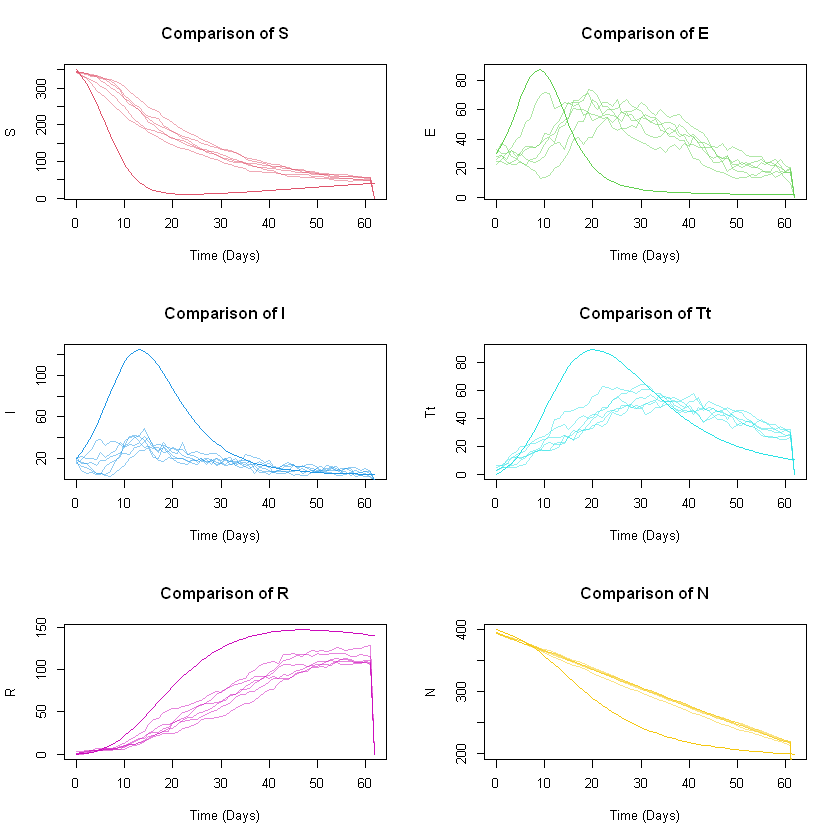

In [23]:
par(mfrow = c(3, 2))
statuses <- c("S", "E", "I", "Tt", "R", "N")
colors <- c(2, 3, 4, 5, 6, 7)
colors_alpha <- sapply(colors, function(col) rgb(red = col2rgb(col)[1,]/255, green = col2rgb(col)[2,]/255, blue = col2rgb(col)[3,]/255, alpha = 0.5))
for (j in 1:length(statuses)) {
  plot(out[, "time"], out[, statuses[j]], type = "l", col = colors[j], xlab = "Time (Days)", ylab = statuses[j], main = paste("Comparison of", statuses[j]))
  for (i in 1:length(status_counts_list)) {
    status_counts <- status_counts_list[[i]]
    counts <- numeric(length = length(times))
    for (t in times) {
      counts[as.numeric(t)] <- status_counts[[as.character(t)]][j]
    }
    lines(times, counts, col = colors_alpha[j])
  }
}

## Conclusion

The experiments conducted provide valuable insights into the dynamics of disease spread in different network structures and under various conditions. The SEITR model was applied to both Erdős–Rényi graphs and weakly connected clusters, with the latter representing a more realistic scenario of separate farmsteads or communities. In the first experiment, the disease dynamics followed the expected trends of the ODE solution closely, demonstrating the effectiveness of the SEITR model in capturing disease spread in a highly connected population. However, the second experiment highlighted the significant impact of network structure on disease dynamics. Despite having the same initial conditions and parameters as the first experiment, the disease spread was slower and less extensive due to the weak connections between clusters. This underscores the importance of considering network structure in epidemiological modeling. The third and fourth experiments further emphasized the stochastic nature of disease spread. By running the first and second experiments multiple times in parallel, we observed a range of outcomes, reflecting the inherent randomness in disease transmission and network generation. Despite the computational challenges, these parallelized experiments provided a more robust understanding of the model’s behavior.

Further, the experiments demonstrated the impact of various parameters on disease dynamics, such as the rate of new individuals entering the population (Lambda), the probabilities of transitioning between states (beta1, beta2, beta3, alpha1, alpha2), and the rates of disease-induced death (delta\_I, delta\_T). By adjusting these parameters, the model can be tailored to simulate a wide range of diseases and outbreak scenarios.

In conclusion, these experiments demonstrate the versatility and applicability of the SEITR model in studying disease spread in populations. The findings contribute to our understanding of disease dynamics and can inform strategies for disease control and prevention. Future work could explore other network structures, incorporate more realistic assumptions about individual behavior and interactions, and apply the model to real-world outbreak data.

## Future Work

The experiments conducted in this study provide a solid foundation for further exploration of disease dynamics using the SEITRN model. However, there are several avenues for future work that could enhance the realism and applicability of the model.

In this study, we used Erdős–Rényi graphs and weakly connected clusters to represent a farmstead and a small town cattle population. While these network structures capture some aspects of real-world populations, they are still quite simplistic. Future work could explore other network types that better represent the complexity and heterogeneity of real-world populations. For instance, scale-free networks, which are characterized by a few highly connected nodes (hubs) and many nodes with few connections, could be used to represent populations with social or spatial structure. Similarly, small-world networks, which exhibit high clustering and short path lengths, could be used to represent populations with strong local connections and occasional long-range connections.

There are several ways in which the SEITR model could be adjusted to make it more realistic. One possibility is to incorporate age structure into the model, as age can significantly influence an individual’s susceptibility to infection, their likelihood of transmitting the disease, and their probability of recovery. Another possibility is to include spatial structure in the model, as the spatial distribution of individuals can greatly affect disease spread. This could be achieved by using spatially explicit network models or by incorporating spatially dependent transmission rates into the model.

In this study, the model parameters were set manually based on reasonable assumptions. However, in a real-world outbreak, these parameters would need to be estimated from data. Future work could explore methods for parameter estimation, such as maximum likelihood estimation or Bayesian inference. These methods could be used to fit the model to outbreak data and estimate the parameters that best explain the observed disease dynamics.